In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

import sklearn
import scipy
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the dataet
fraud_detection = pd.read_csv('/content/creditcard.csv')

In [3]:
#to present the first five rows of the dataset
fraud_detection.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
fraud_detection.shape

(284807, 31)

(284807,31 )

In [5]:
fraud_detection.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#to present the info about the dataset
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Handling missing values**

In [7]:
#to check the missing values in the dataset
fraud_detection.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Hence, 0 null values.

**Duplicated values**

Removed the duplicate rows from the original fraud detection and then calculated and printed the number of remaining non-duplicate rows in the DataFrame.

In [8]:
fraud_detection[fraud_detection.duplicated()]['Class'].value_counts()

0    1062
1      19
Name: Class, dtype: int64

In [9]:
fraud_detection = fraud_detection[~fraud_detection.duplicated()]

In [10]:
len(fraud_detection)

283726

after removing duplicated values from 'class' the total length was 283726

**Distribution of "class"**

In [11]:
fraud_detection['Class'].unique()

array([0, 1])

In [12]:
fraud_detection['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

(283253,473)

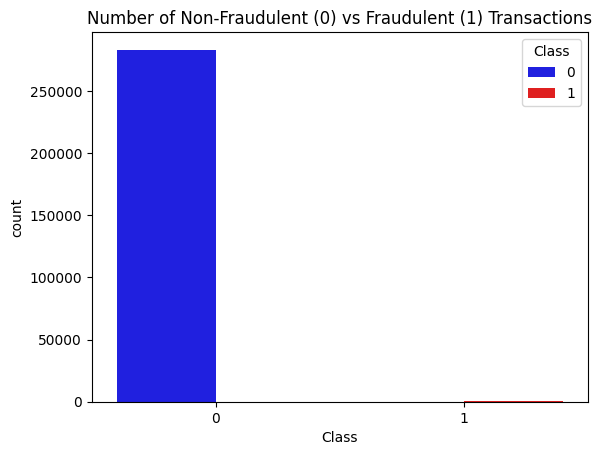

In [13]:
# Bar plot for the number of fraudulent vs non-fraudulent transactions
sns.countplot(x='Class', data=fraud_detection, hue='Class', palette={0: 'blue', 1: 'red'})
plt.title('Number of Non-Fraudulent (0) vs Fraudulent (1) Transactions')
plt.show()


**Numerical anaysis on TIME & Amount**

In [14]:
fraud = fraud_detection[fraud_detection['Class']==1]
valid = fraud_detection[fraud_detection['Class']==0]

In [15]:
print(fraud.shape, valid.shape)

(473, 31) (283253, 31)


(283253,31),(473,31)

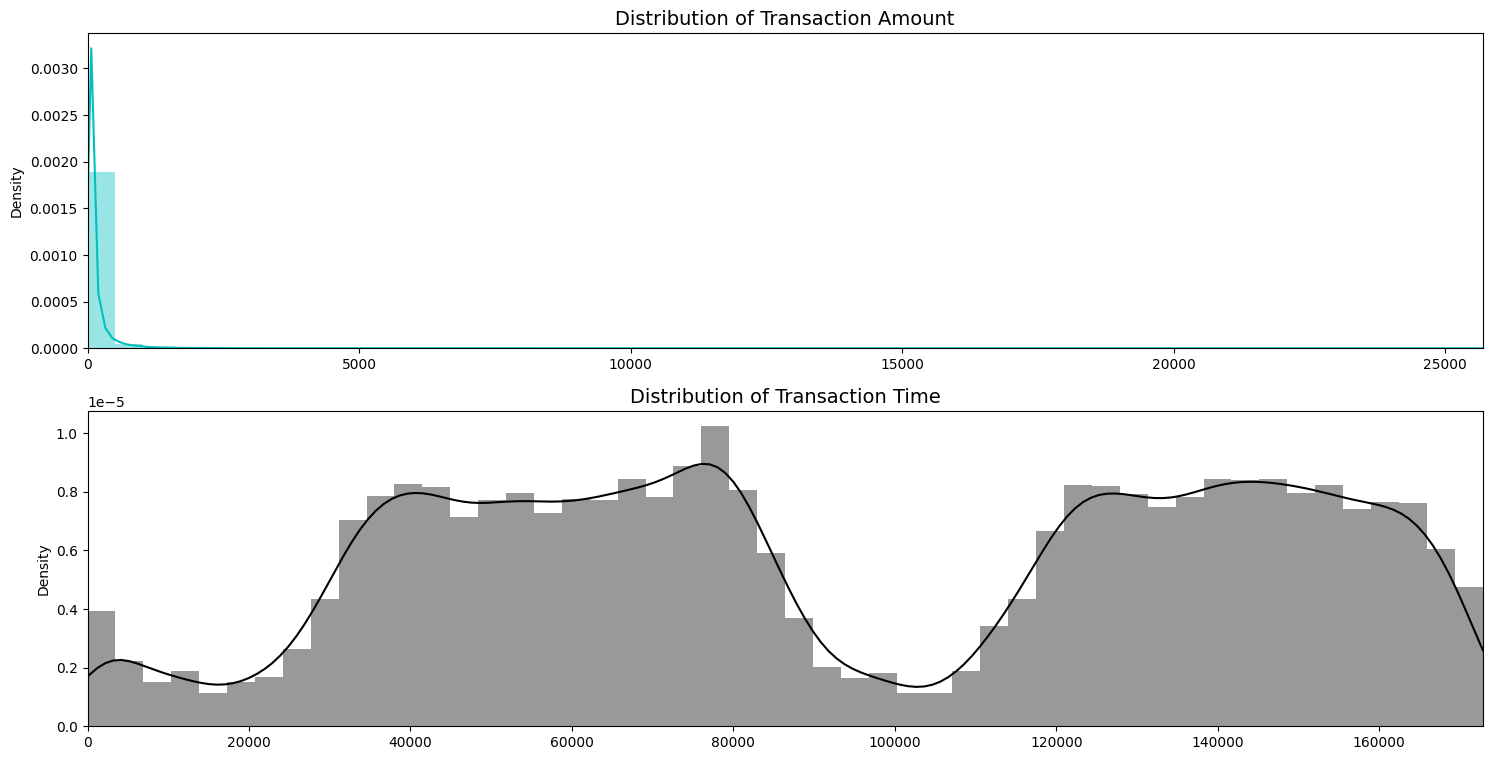

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(18,9))

amount_val = fraud_detection['Amount'].values
time_val = fraud_detection['Time'].values

sns.distplot(amount_val, ax=ax[0], color='c')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='k')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

The transaction amount distribution shows that most transactions are small, with amounts less than 5000. There are a few large transactions, but they are much less common

The transaction time distribution shows that most transactions are processed very quickly, within 20000 milliseconds (20 seconds). There are a few transactions that take longer, but they are much less common.

In [17]:
fraud_detection['Amount'].skew()

16.978803370060476

'AMOUNT' is highly skewed and 'TIME' makes no difference

**# BINARY CLASS Analysis on fraud vs non fraud**

Class vs Time

In [18]:
# Creating fraudulent dataframe
fraud_df = fraud_detection[fraud_detection['Class'] == 1]
# Creating non fraudulent dataframe
non_fraud_df = fraud_detection[fraud_detection['Class'] == 0]

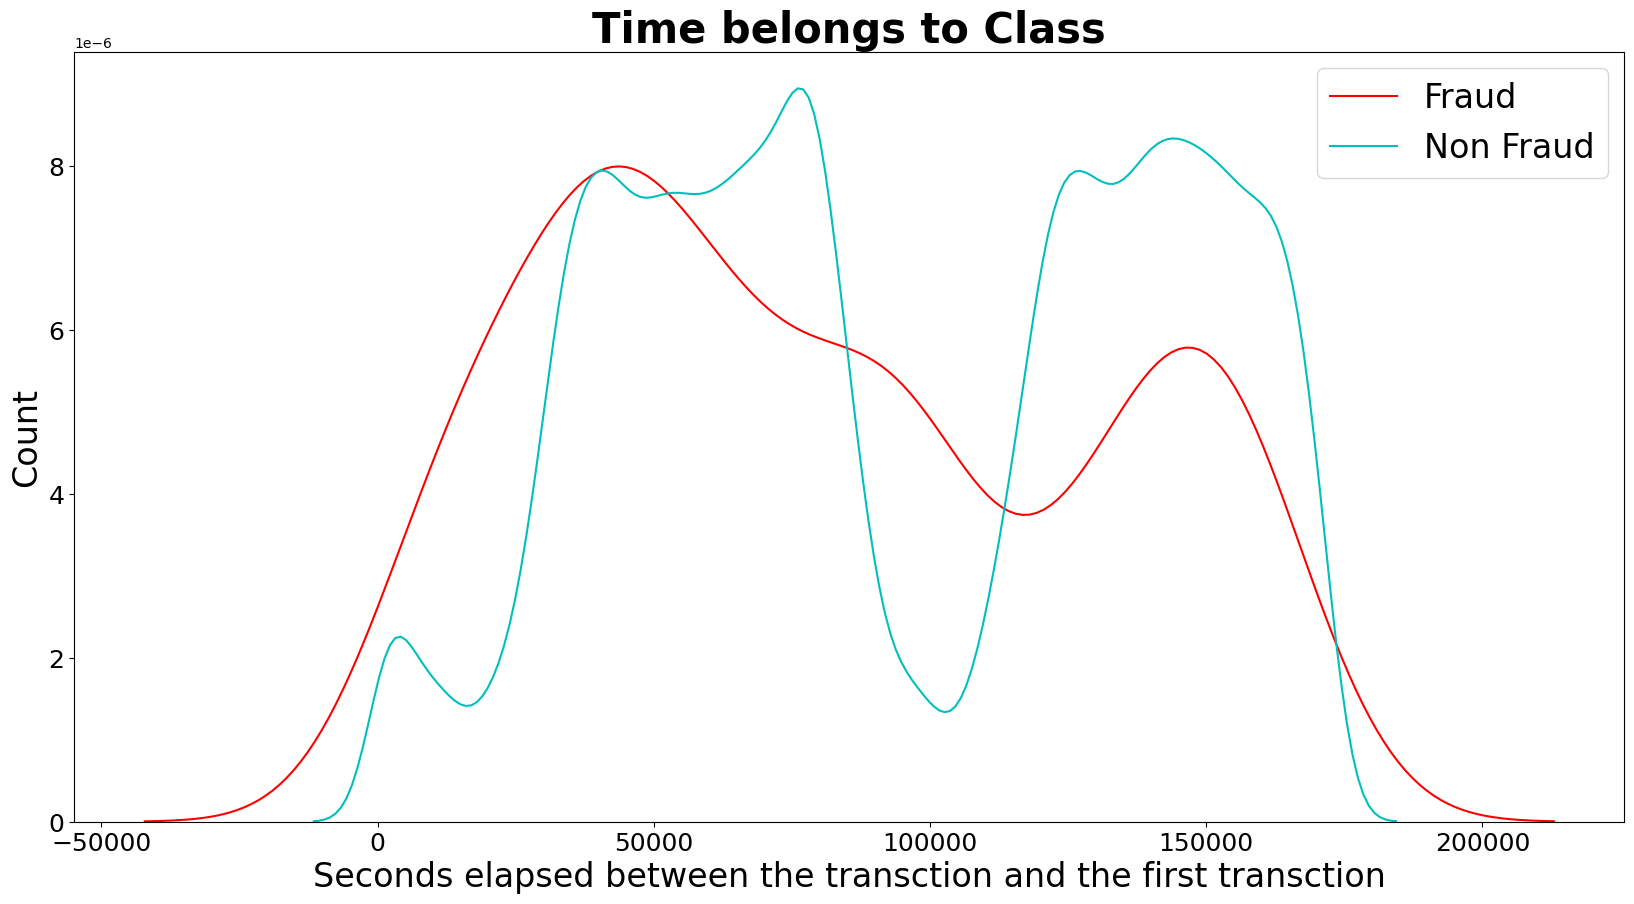

In [19]:
# Distribution plot
plt.figure(figsize=(20,10))

ax = sns.distplot(fraud_df['Time'],color='r', label='Fraud', hist=False);
ax = sns.distplot(non_fraud_df['Time'], color ='c', label='Non Fraud', hist=False);

ax.set_title('Time belongs to Class', fontweight = 'bold', size =30 )
ax.set_ylabel('Count', fontsize = 24) # Y label
ax.set_xlabel('Amount', fontsize = 24) # X label
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
ax.legend(loc="upper right", frameon=True, fontsize=24)
plt.show()

Conclusion- No trend

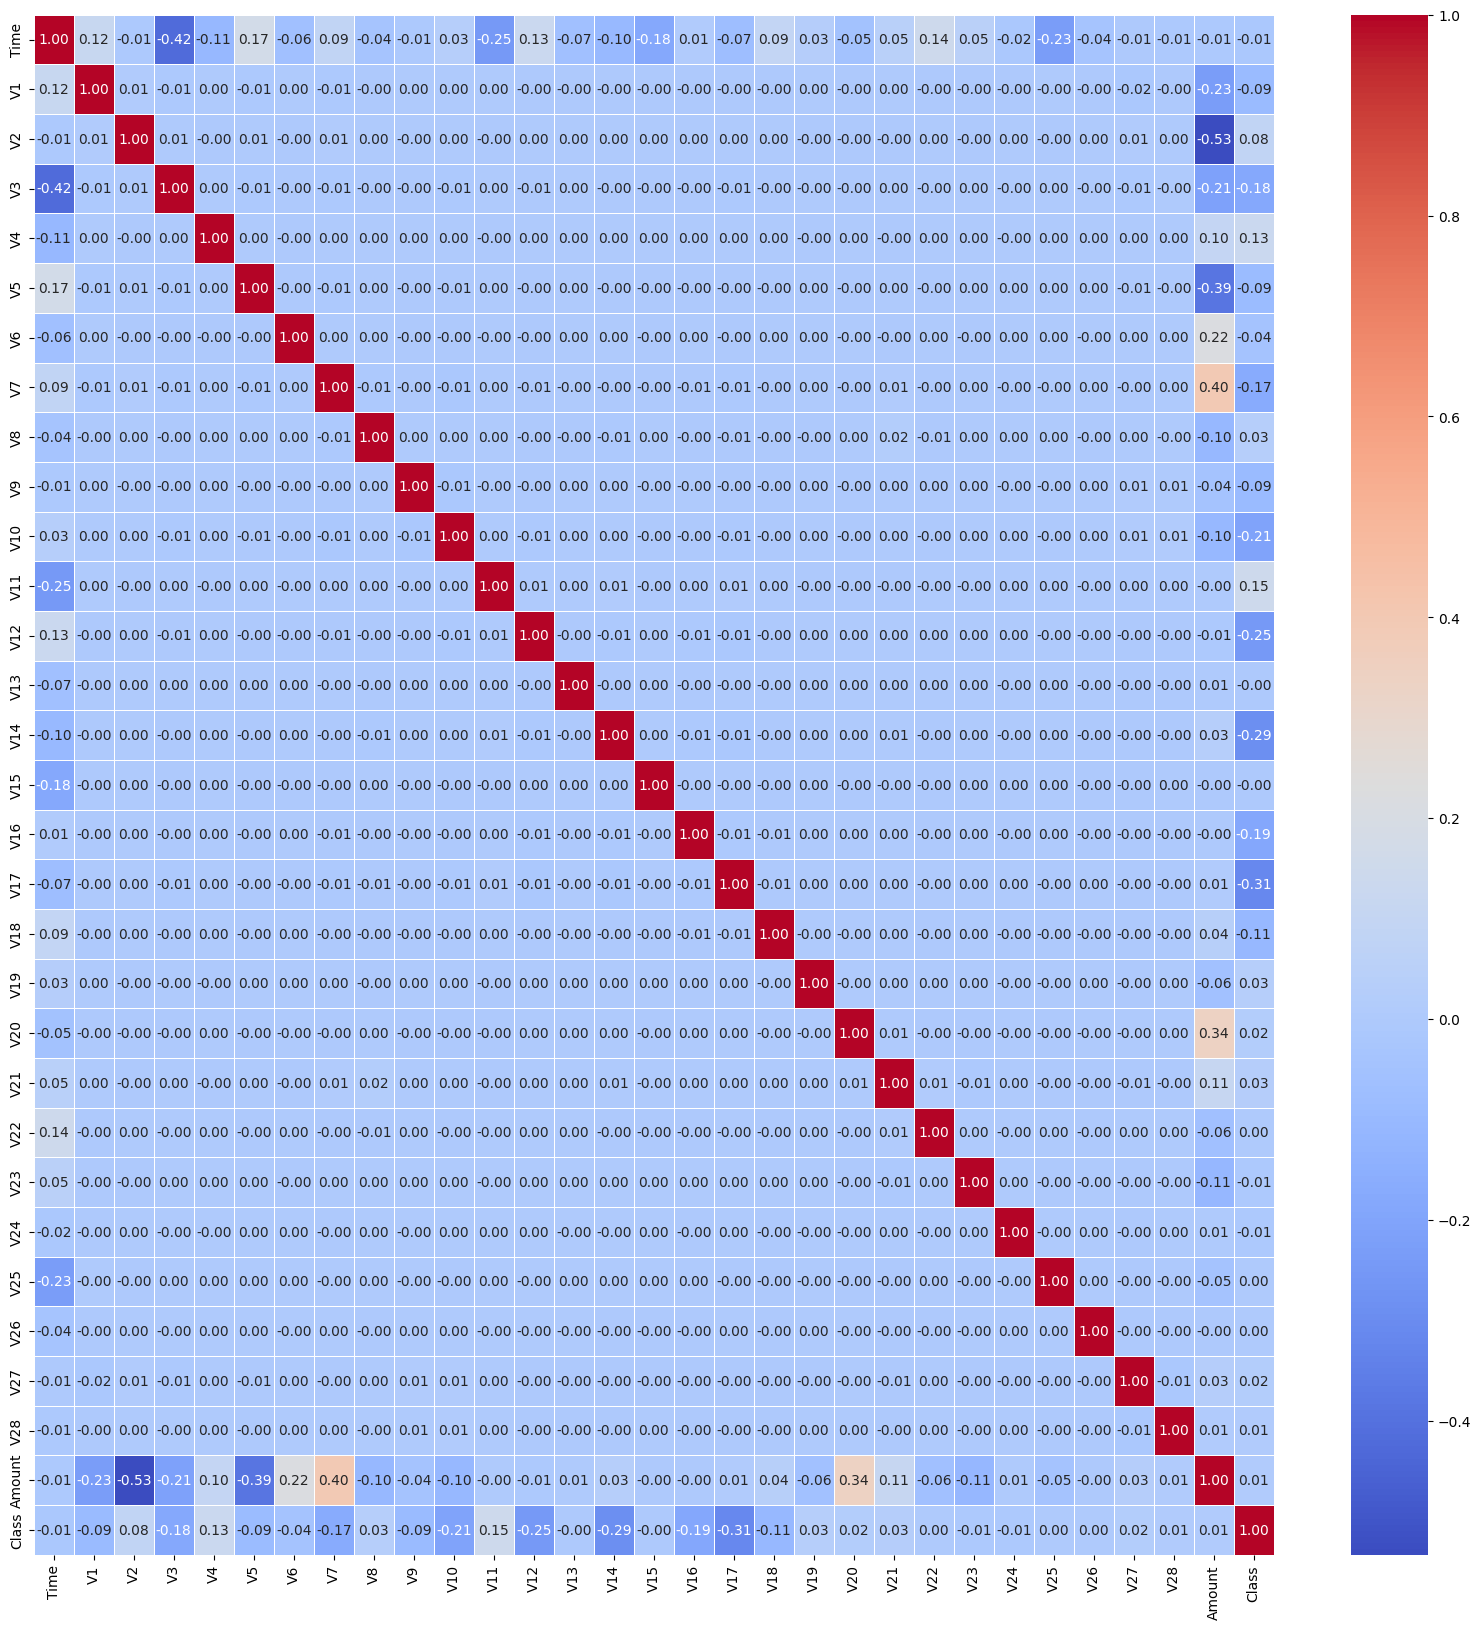

In [20]:
# Create a correlation matrix
correlation_matrix = fraud_detection.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

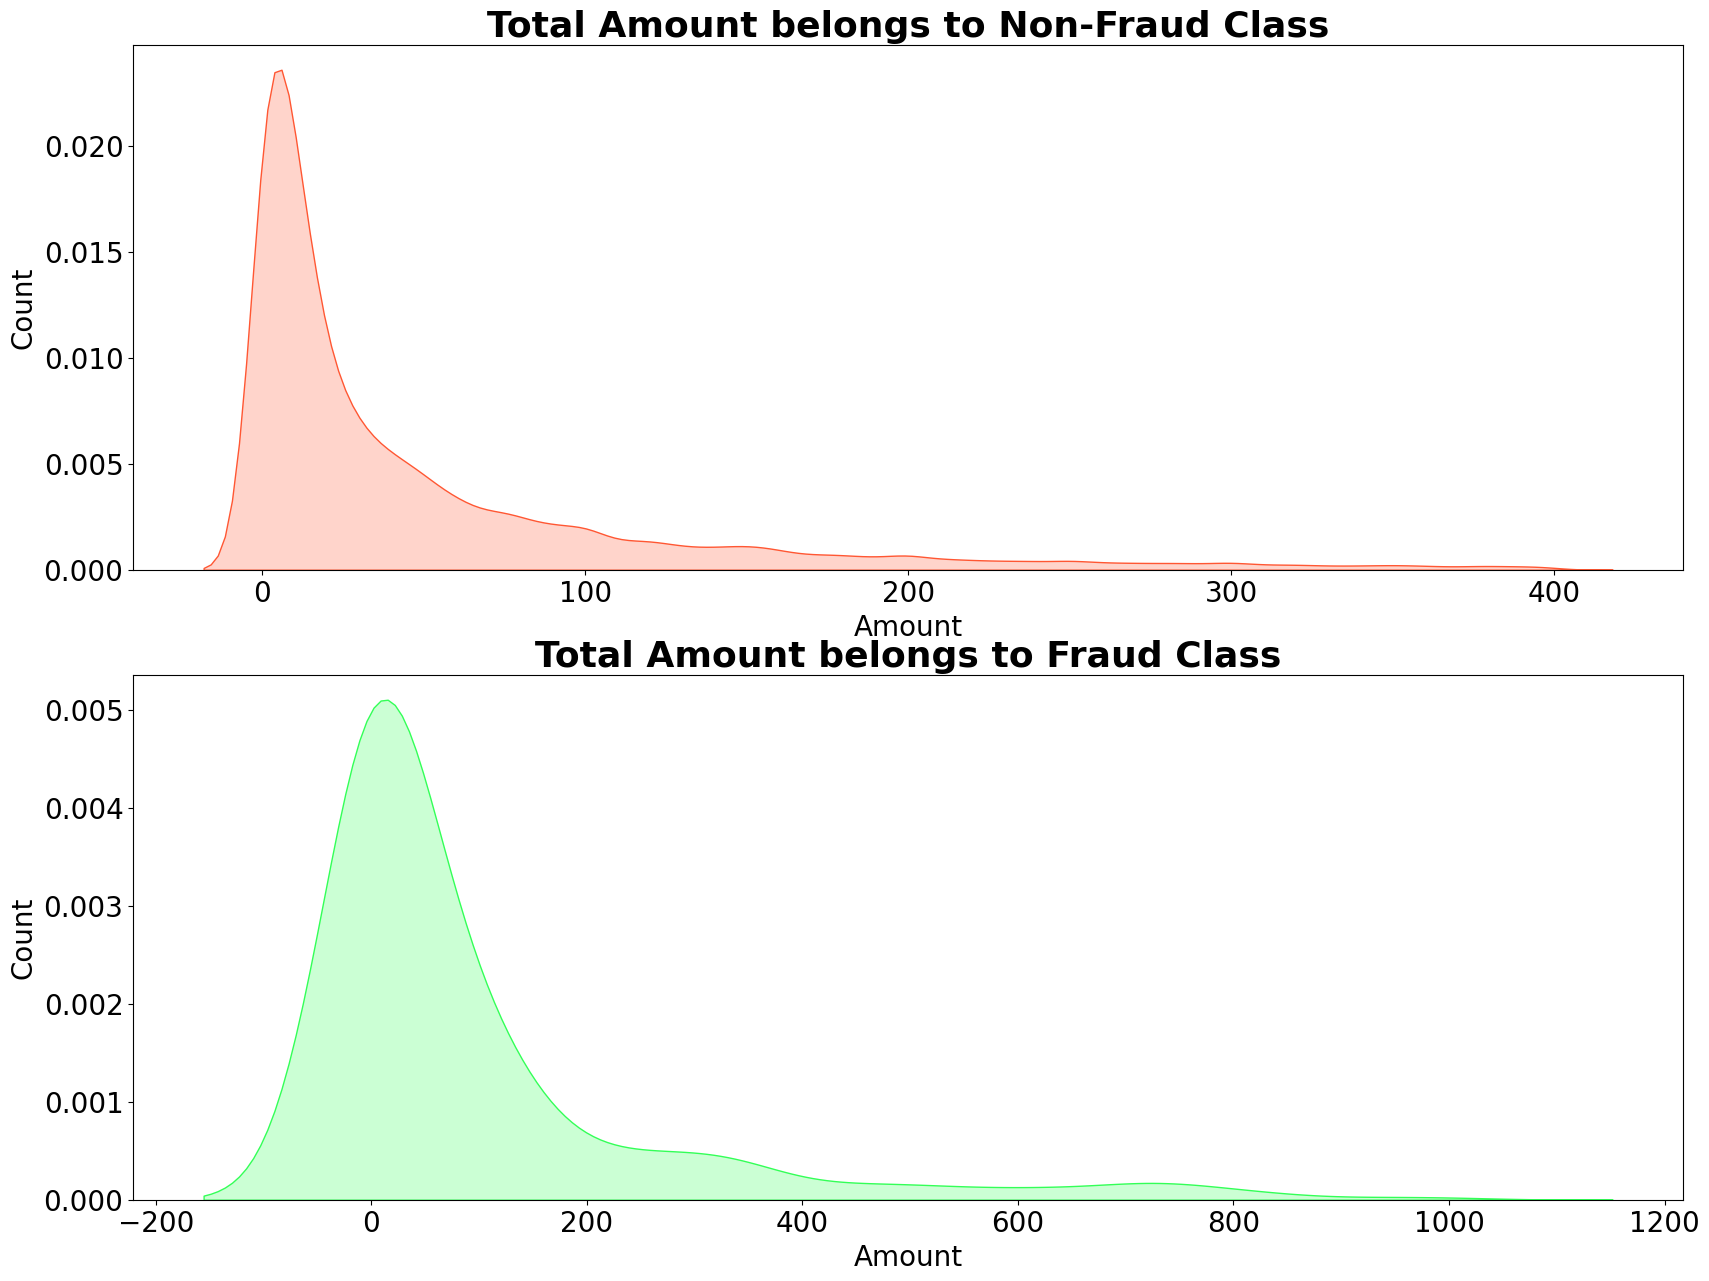

In [21]:
# Limiting Range to get a better view over value trend.
sample_df_class_0 = fraud_detection[fraud_detection['Amount'].between(-250, 400, inclusive=False) & (fraud_detection['Class'] == 0)]
sample_df_class_1 = fraud_detection[fraud_detection['Amount'].between(-250, 1000, inclusive=False) & (fraud_detection['Class'] == 1)]

# Setting a color palette for better distinction
colors = ["#FF5733", "#33FF57"]

fig, ax = plt.subplots(2, 1, figsize=(20, 15))
sns.set_style("whitegrid")

ax[0].set_title('Total Amount belongs to Non-Fraud Class', fontweight='bold', size=26)
ax[0].set_ylabel('Count', fontsize=20)  # Y label
ax[0].set_xlabel('Amount', fontsize=20)  # X label
ax[0].tick_params(axis='both', which='major', labelsize=20)
sns.kdeplot(data=sample_df_class_0["Amount"], color=colors[0], ax=ax[0], shade=True)

ax[1].set_title('Total Amount belongs to Fraud Class', fontweight='bold', size=26)
ax[1].set_ylabel('Count', fontsize=20)  # Y label
ax[1].set_xlabel('Amount', fontsize=20)  # X label
ax[1].tick_params(axis='both', which='major', labelsize=20)
sns.kdeplot(data=sample_df_class_1["Amount"], color=colors[1], ax=ax[1], shade=True)

plt.show()


**TRIMMING THE DATA**

we will drop 'TIMe'

In [22]:
# Dropping the Time column
fraud_detection.drop('Time', axis=1, inplace=True)

WE CAN DROP DUPLICATED NON FRAUD DATA

In [23]:
fraud_detection[fraud_detection.duplicated()]['Class'].value_counts()

0    8063
Name: Class, dtype: int64

8063 are non fraudenlent and of no use. So, we will drop them

In [24]:
fraud_detection = fraud_detection[~fraud_detection.duplicated()]

In [25]:
fraud_detection.shape

(275663, 30)

In [26]:
# Creating fraudulent dataframe
fraud_detection_class1 = fraud_detection[fraud_detection['Class'] == 1]
# Creating non fraudulent dataframe
fraud_detection_class0 = fraud_detection[fraud_detection['Class'] == 0]

**SKEWNESS**

prints the maximum transaction amount among the fraudulent transactions

In [27]:
fraud_detection_class0["Amount"].max()


25691.16

prints the maximum transaction amount among the non-fraudulent transactions

In [28]:
fraud_detection_class1["Amount"].max()

2125.87

In [29]:
fraud_detection_class0 = fraud_detection[fraud_detection['Amount'].between(-1,2500, inclusive=False) & (fraud_detection['Class'] == 0)]

In [30]:
fraud_detection_class0["Amount"].max()

2499.9

 new DataFrame is created by selecting rows from the original DataFrame  where the 'Amount' is between -1 and 2500 (exclusive).

In [31]:
new_fraud_detection = fraud_detection[fraud_detection['Amount'].between(-1,2500, inclusive=False)]

In [32]:
new_fraud_detection.shape

(275217, 30)

In [33]:
fraud_detection_class1.shape

(473, 30)

(275217,473)

In [34]:
fraud_detection.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


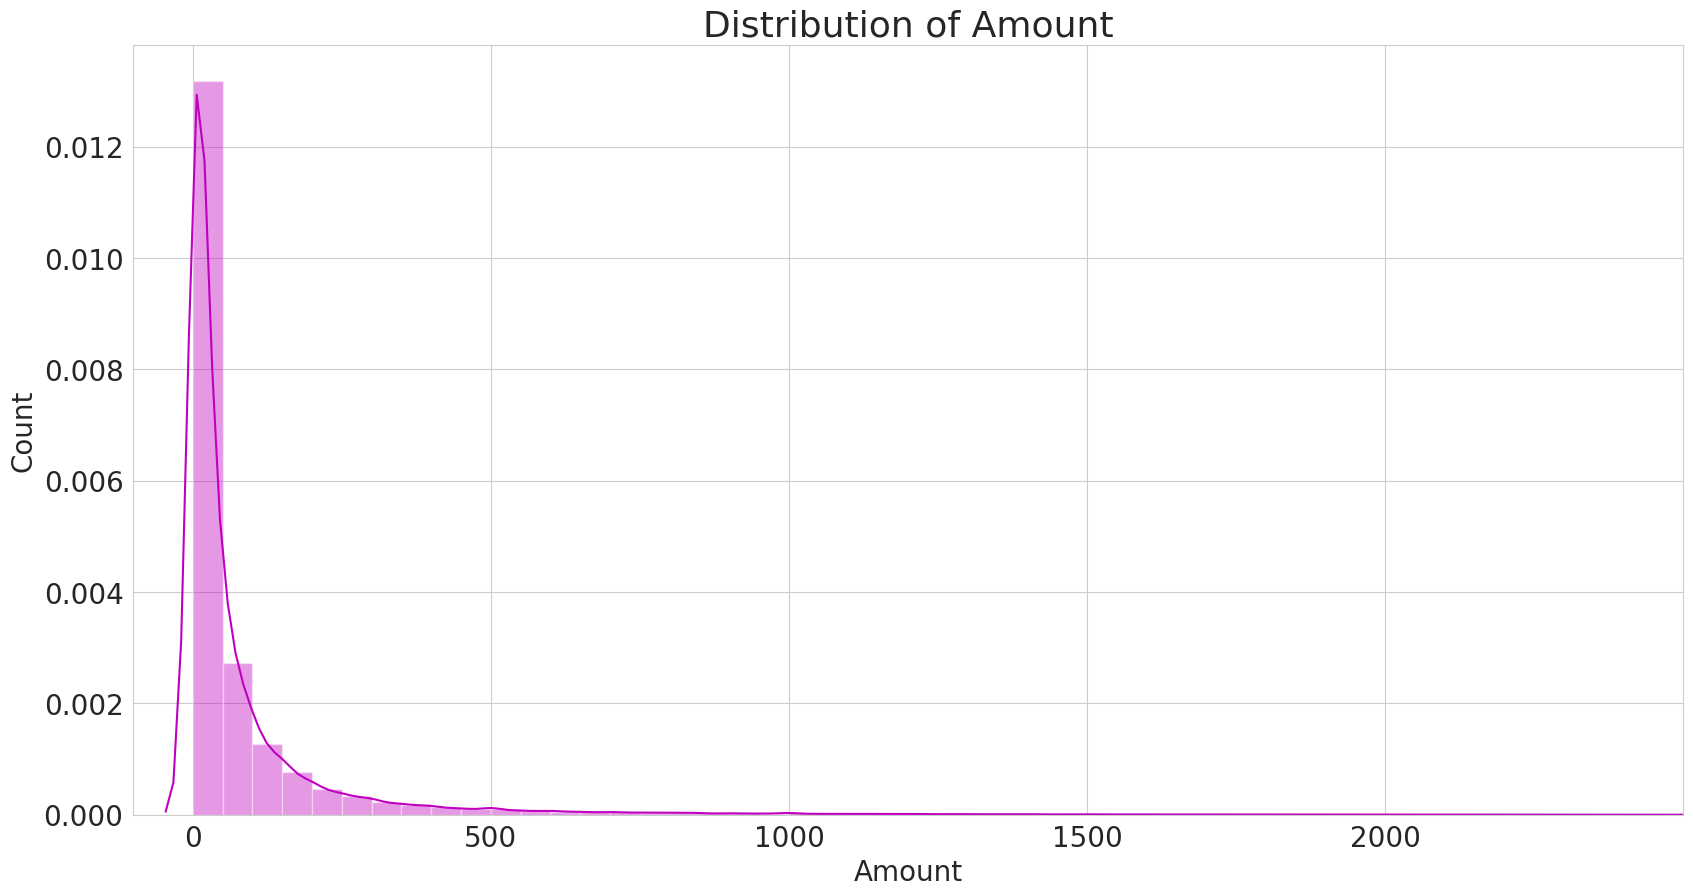

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

amount_val = new_fraud_detection['Amount'].values

sns.distplot(amount_val, ax=ax, color='m')
ax.set_title('Distribution of Amount', size =26)

ax.set_xlim([-100, max(amount_val)])

ax.set_ylabel('Count', fontsize = 20) # Y label
ax.set_xlabel('Amount', fontsize = 20) # X label
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)

plt.show()

Skewness of 'Amount'

In [36]:
new_fraud_detection['Amount'].skew()

5.407765831113532

In [37]:
fraud_detection['Amount'].skew()

16.841622118790013

In [38]:
new_fraud_detection.shape

(275217, 30)

In [39]:
fraud_detection.shape

(275663, 30)

In [40]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [41]:
fraud_detection['Amount_bc'] = boxcox1p(fraud_detection['Amount'], boxcox_normmax(fraud_detection['Amount'] + 1))

In [42]:
new_fraud_detection['Amount_bc'] = boxcox1p(new_fraud_detection['Amount'], boxcox_normmax(new_fraud_detection['Amount'] + 1))

In [43]:
def num_plot(fraud_detection, col, title):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9, 5), gridspec_kw={"height_ratios": (.2, .8)})

    ax[0].set_title('Distribution of Transaction Amount', fontweight='bold', size=16)
    sns.boxplot(x=col, data=fraud_detection, ax=ax[0], color='skyblue')  # Changed boxplot color
    ax[0].set(yticks=[])
    ax[0].tick_params(axis='both', which='major', labelsize=20)

    sns.histplot(x=col, data=fraud_detection, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)

    ax[1].set_ylabel('Count', fontsize=16)  # Y label
    ax[1].set_xlabel('Amount', fontsize=16)  # X label
    ax[1].tick_params(axis='both', which='major', labelsize=14)

    plt.axvline(fraud_detection[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(fraud_detection[col].mean(), 1)))
    plt.axvline(fraud_detection[col].median(), color='red', linewidth=2.2, label='median=' + str(np.round(fraud_detection[col].median(), 1)))
    plt.axvline(fraud_detection[col].mode()[0], color='purple', linewidth=2.2, label='mode=' + str(np.round(fraud_detection[col].mode()[0], 1)))
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)

    plt.tight_layout()
    plt.show()


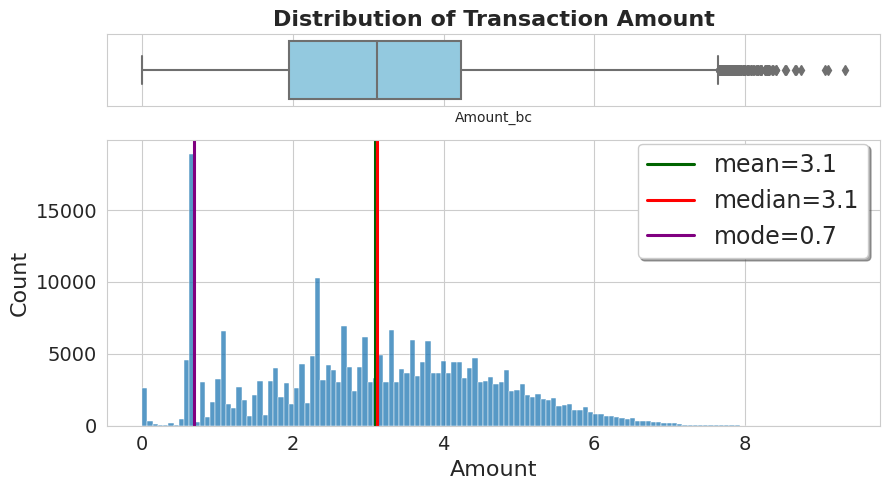

In [44]:
num_plot(fraud_detection,'Amount_bc', 'Box Cox transform on Amount')

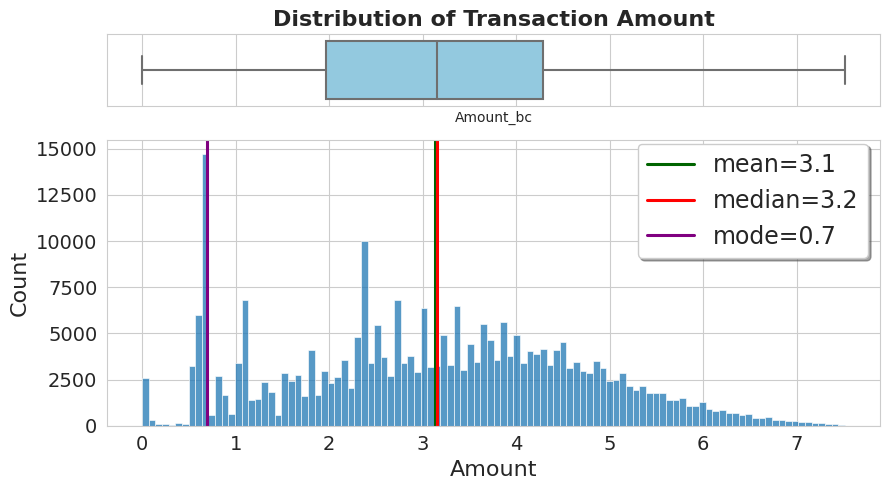

In [45]:
num_plot(new_fraud_detection,'Amount_bc', 'Box Cox transform on Amount')

In [46]:
print(fraud_detection.columns)


Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Amount_bc'],
      dtype='object')


no visible serious corelation left in data.

In [47]:
new_fraud_detection.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_bc
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,4.887316
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.296877
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.761071
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.706281
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.170224




**SCALING THE DATA 'Amount'**

In [48]:
from sklearn.preprocessing import RobustScaler

In [49]:

rob_scaler = RobustScaler()

new_fraud_detection['robust_amount'] = rob_scaler.fit_transform(new_fraud_detection['Amount'].values.reshape(-1,1))

new_fraud_detection['robust_amount_bc'] = rob_scaler.fit_transform(new_fraud_detection['Amount_bc'].values.reshape(-1,1))

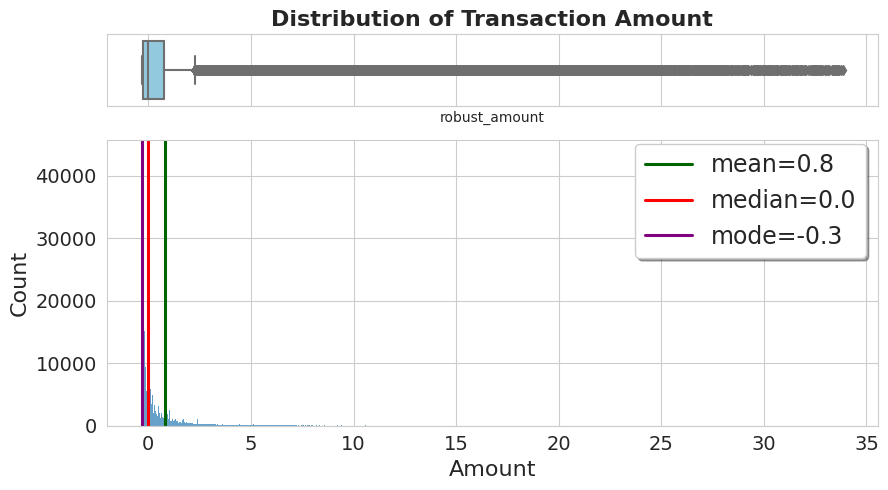

In [50]:
num_plot(new_fraud_detection,'robust_amount', 'Box Cox transform on Amount')

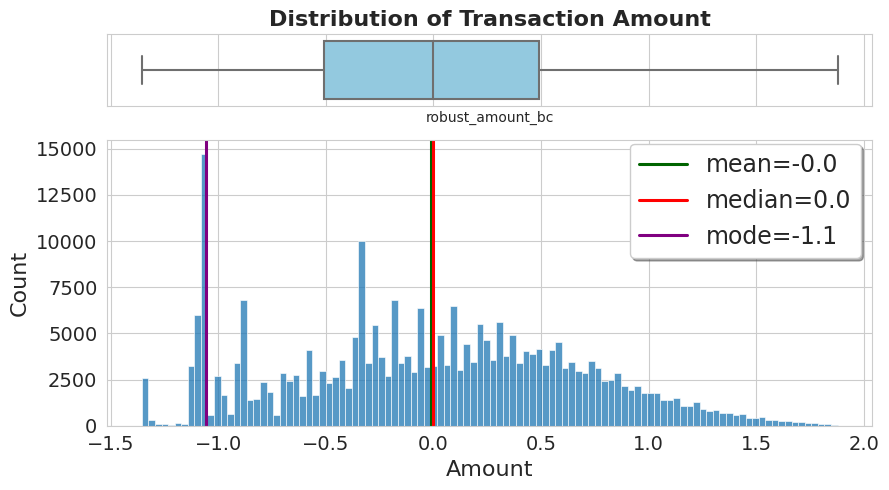

In [51]:
num_plot(new_fraud_detection,'robust_amount_bc', 'Box Cox transform on Amount')

In [52]:
new_fraud_detection.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,Class,Amount_bc,robust_amount,robust_amount_bc
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,4.887316,1.722055,0.747033
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.296877,-0.285734,-0.797221
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.761071,4.851872,1.122837
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.706281,1.365127,0.669170
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.170224,0.633916,0.438611


In [53]:
scaled_amount = new_fraud_detection['robust_amount_bc']

new_fraud_detection.drop(['Amount', 'Amount_bc', 'robust_amount', 'robust_amount_bc'], axis=1, inplace=True)
new_fraud_detection.insert(0, 'scaled_amount', scaled_amount)

# Amount is Scaled!

new_fraud_detection.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.747033,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.797221,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.122837,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.669170,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.438611,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


**Train-Test Split**

In [54]:
x = new_fraud_detection.drop("Class", axis=1)
y = new_fraud_detection.Class

In [55]:
# Import library
from sklearn.model_selection import train_test_split

# Splitting data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

In [56]:
x_train.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
84320,0.259255,1.146571,-0.871057,0.749971,-1.933297,-1.576957,-0.912775,-0.748242,0.084954,2.355311,...,1.216443,-0.077865,0.224482,0.795043,-0.170005,0.563452,0.572404,-0.670774,0.087521,0.028263
216757,0.093694,-0.177304,-0.193482,0.850101,-0.300564,0.719677,1.441398,-0.310078,0.617336,0.543572,...,-1.531704,-0.133341,0.456502,1.548517,0.183974,-1.312330,-1.151204,0.688636,0.178322,0.102186
13385,1.594910,-1.198766,-3.088928,-1.003308,3.712511,-0.913999,-0.079777,2.020245,-0.558136,0.077140,...,-1.962064,2.233715,0.623987,-0.729419,-1.100585,0.397623,0.136963,-0.090517,-0.281533,0.216404
275538,0.301444,2.159948,-0.656212,-2.211010,-1.082799,0.179554,-1.023388,0.146259,-0.371588,-1.223879,...,0.861886,0.039670,0.421033,1.069178,-0.064724,0.764540,0.398888,0.026317,-0.092850,-0.078407
124447,-1.000166,-0.479155,0.888429,1.443572,-0.184232,0.117452,-1.363753,0.741770,-0.120123,-0.388257,...,-0.763824,-0.128904,-0.138596,-0.519367,0.095176,0.644733,-0.662253,-0.132915,0.097771,0.171133


Scaling test and train set

In [57]:
scaler = StandardScaler()

In [58]:
x_train['scaled_amount'] = scaler.fit_transform(x_train[['scaled_amount']])

In [59]:
x_test['scaled_amount'] = scaler.transform(x_test[['scaled_amount']])
x_test.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
276813,0.025389,2.270701,-0.708816,-1.760370,-1.030770,-0.062187,-0.803847,-0.198470,-0.360775,-0.411664,...,1.213556,0.004307,-0.034436,-0.075052,0.053403,-0.991936,0.122802,-0.217941,-0.043396,-0.071600
137072,-1.190000,1.191095,0.128504,0.213973,1.440206,0.165924,1.119574,-0.688739,0.342505,1.120096,...,-0.181796,-0.071077,-0.034521,0.377300,-0.346958,-1.376584,0.825100,0.000650,0.118786,0.047524
43507,-0.255891,-0.322404,1.102696,0.574003,-0.119663,0.260698,-0.479736,0.621775,0.005742,-0.432640,...,0.280884,-0.055812,-0.141803,-0.372684,-0.016309,-0.436570,-0.349132,0.075882,-0.393322,-0.263203
11320,-1.044353,1.231920,0.844809,0.251430,2.689905,0.257747,-0.796567,0.454675,-0.346564,0.272887,...,-1.086379,-0.225997,-0.168988,-0.273863,-0.089875,0.322729,0.698091,0.030810,-0.068421,0.003148
14459,-0.758442,1.296614,0.095678,-1.299196,-0.058554,2.256011,3.291965,-0.358283,0.763933,-0.153525,...,0.000882,-0.015125,-0.024442,-0.176655,-0.136580,1.004095,0.847215,-0.313022,0.015974,0.013853


In [60]:
# Listing the columns
cols = x_train.columns
cols

Index(['scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

**skewness check**

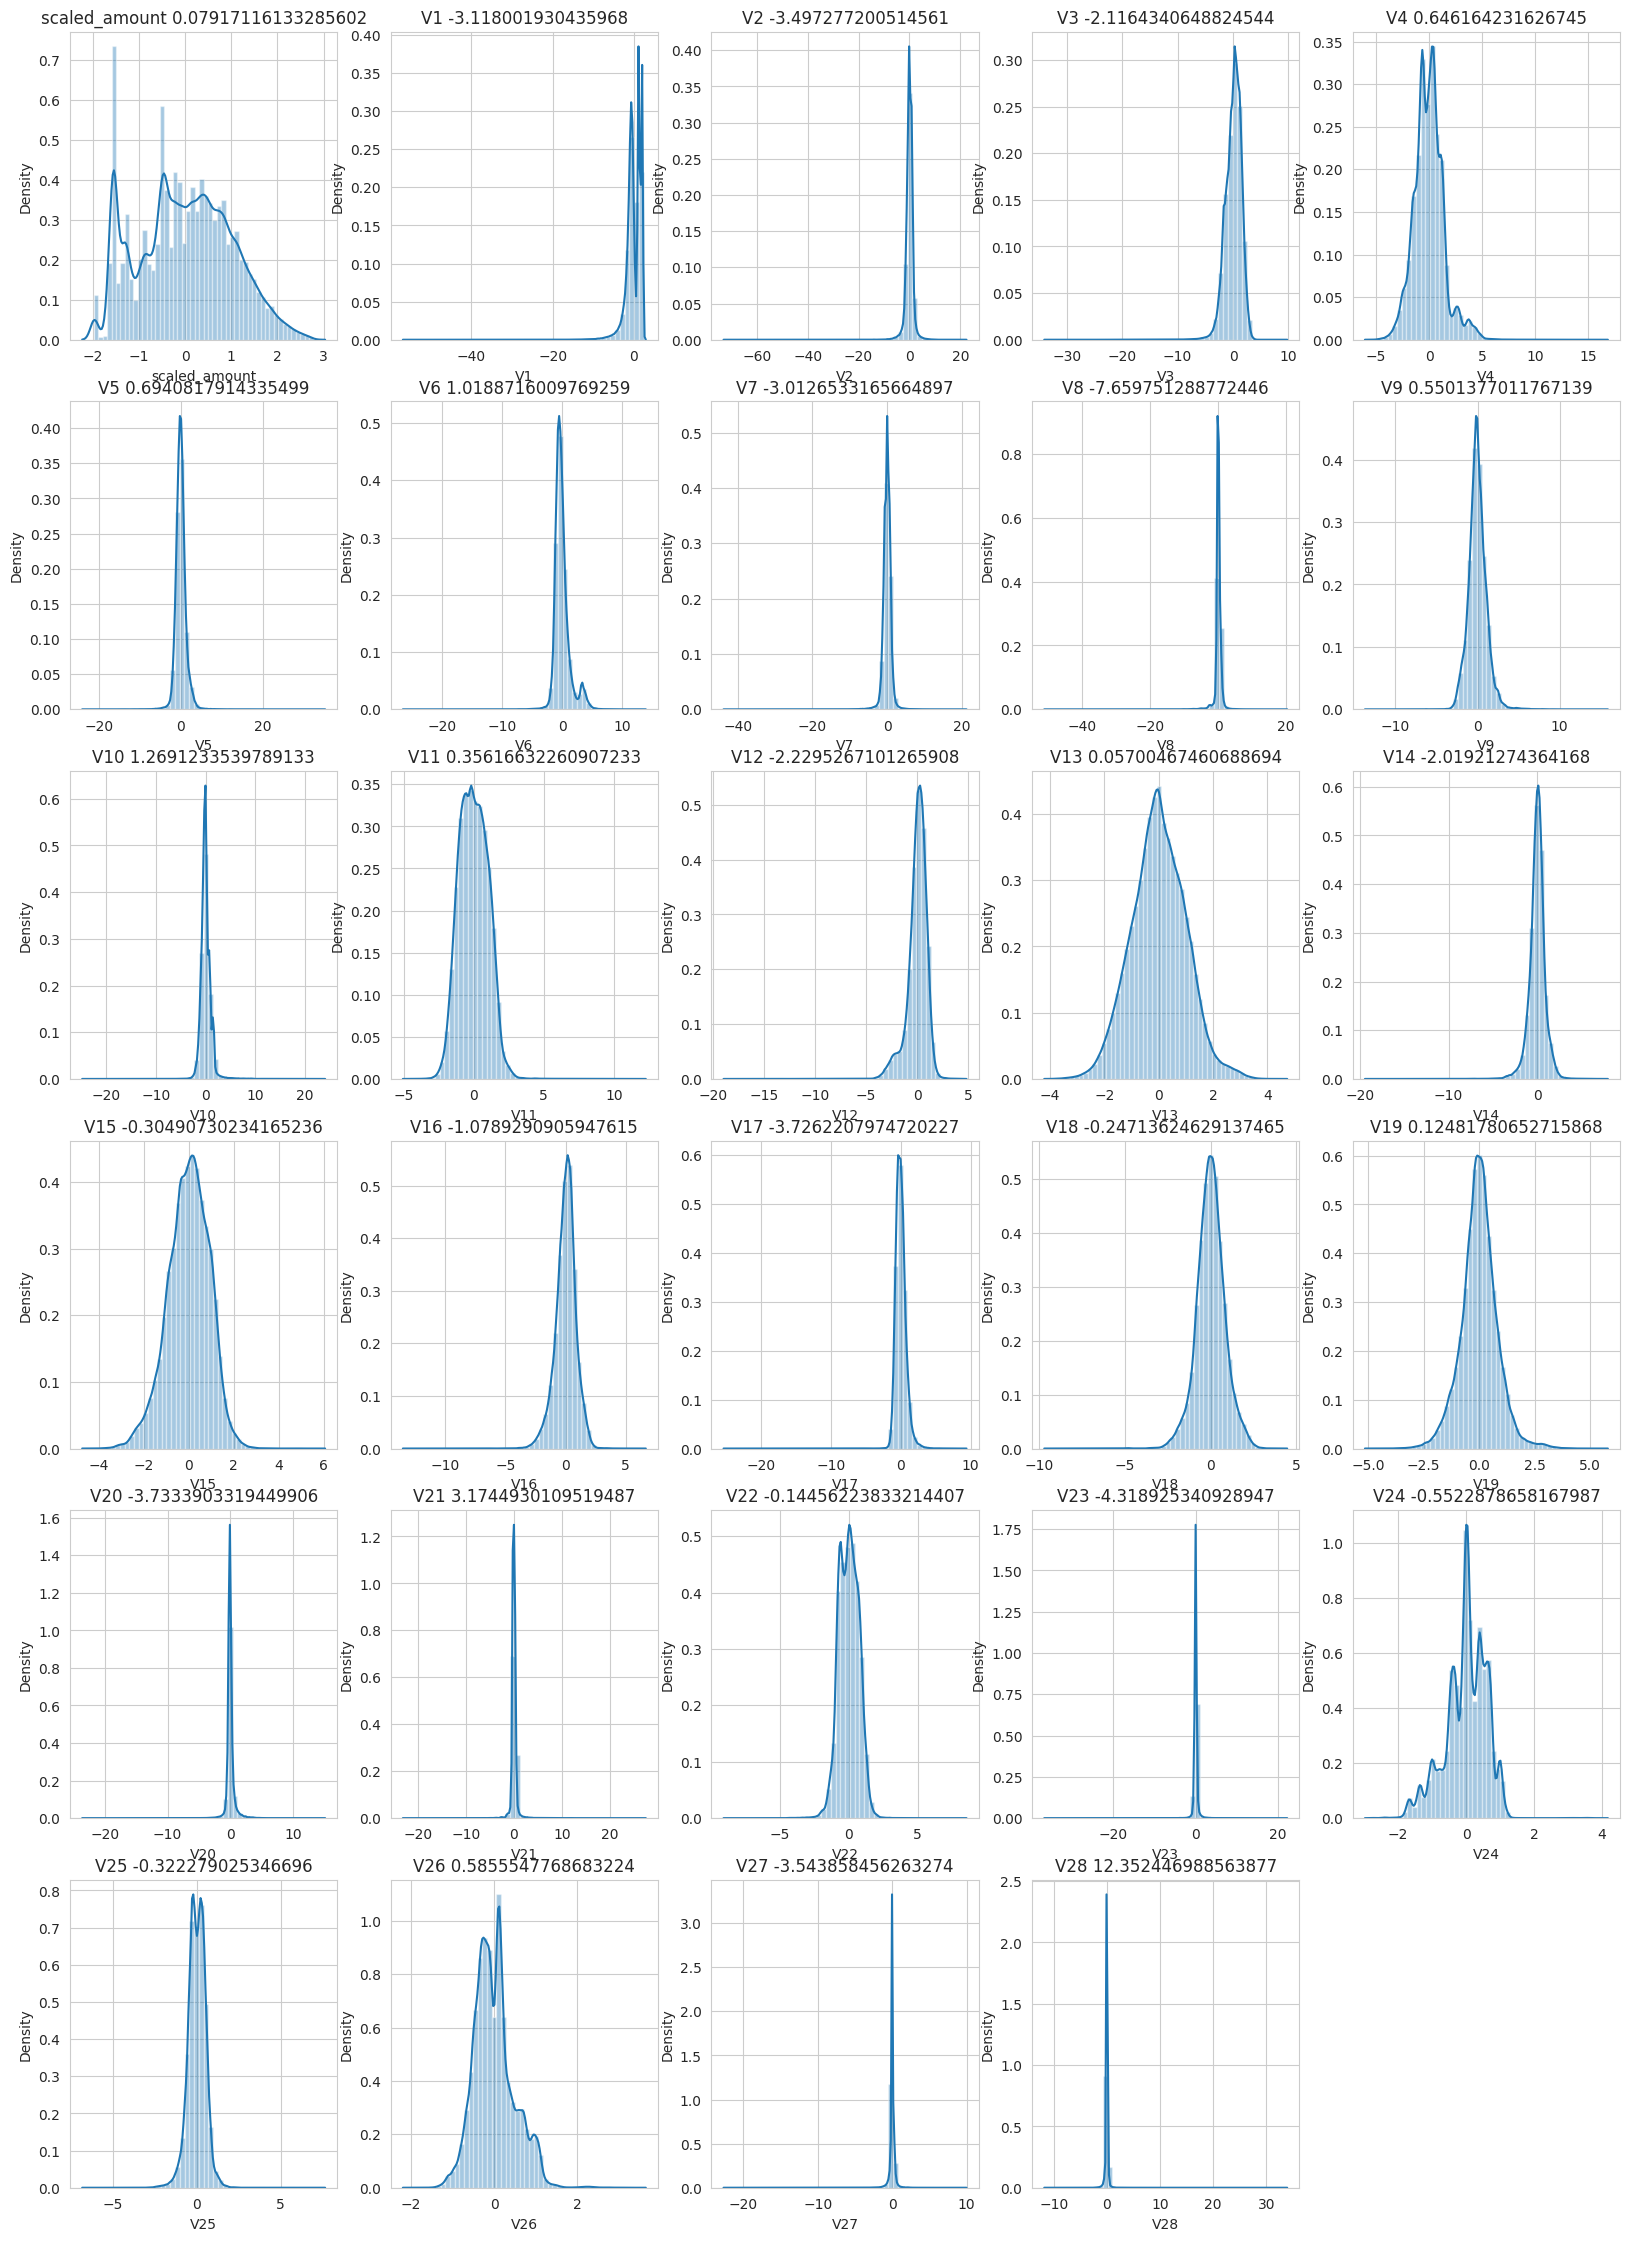

In [61]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(20,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5, k)
    sns.distplot(x_train[col])
    plt.title(col+' '+str(x_train[col].skew()))

Heaving skewed

In [62]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
x_train[cols] = pt.fit_transform(x_train)

In [63]:
# Transform the test set
x_test[cols] = pt.transform(x_test)

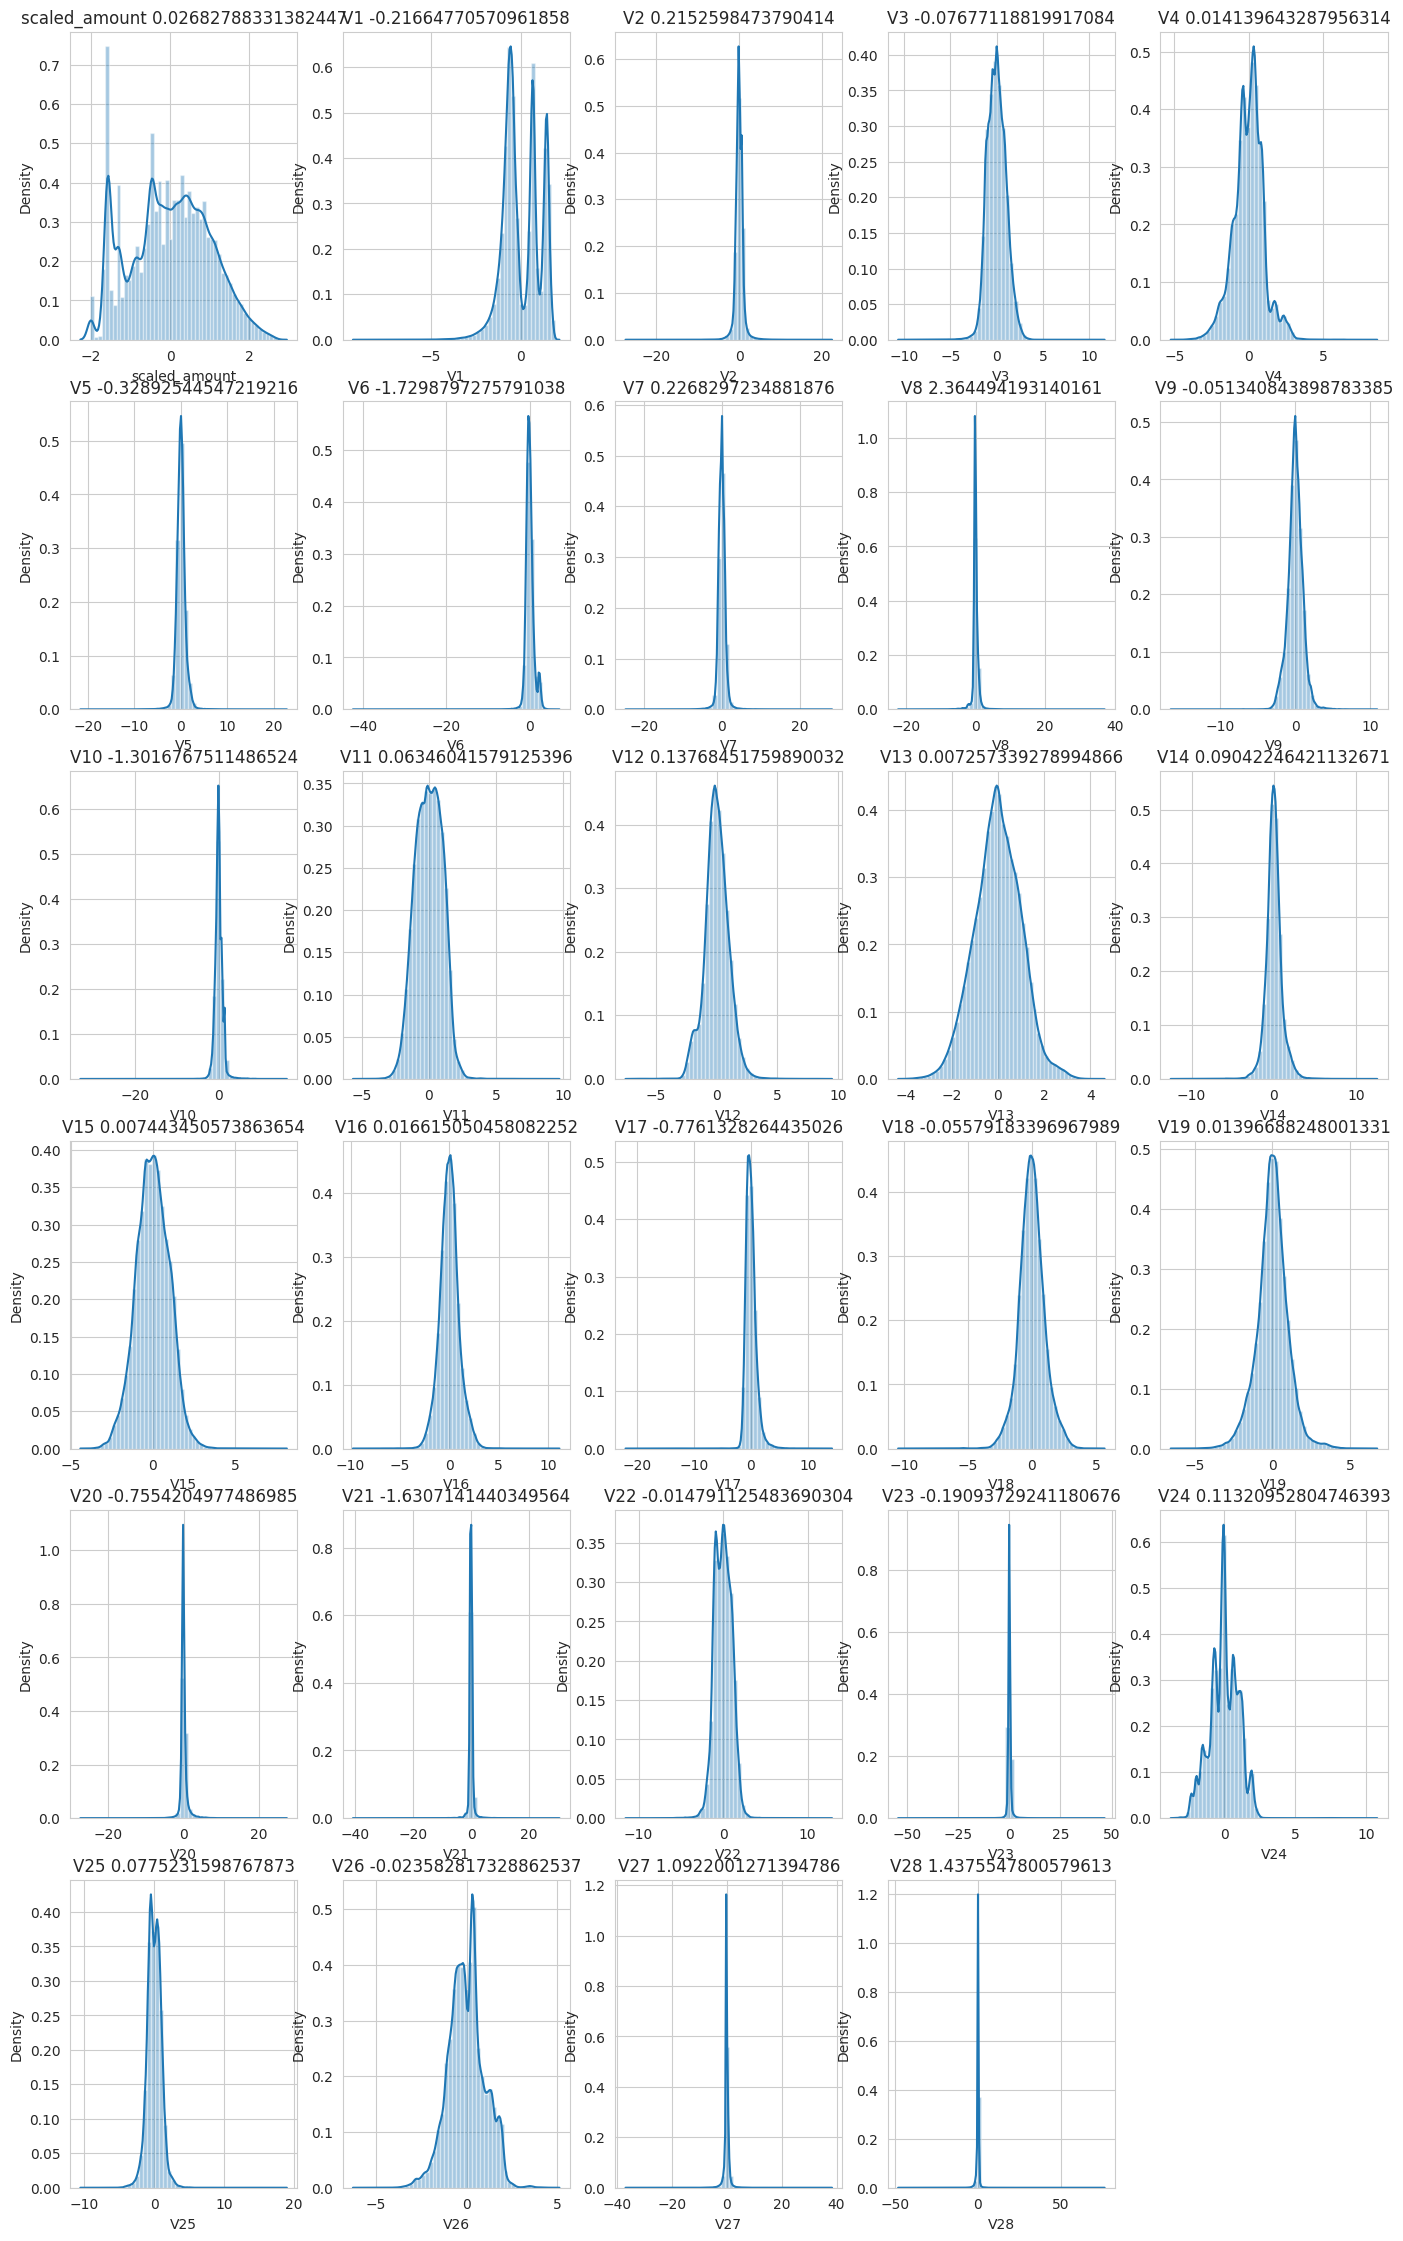

In [64]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(x_train[col])
    plt.title(col+' '+str(x_train[col].skew()))

# **Modelling of Imbalanced data in the dataset**



undersampling

In [65]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# instantiating the random undersampler
rus = RandomUnderSampler()
# resampling X, y
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 219790, 1: 383})
New class distribution:- Counter({0: 383, 1: 383})


**Model building on balanced data with Undersampling**

Logisitic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [67]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(x_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [68]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026390,0.006290,0.009955,0.000942,0.01,{'C': 0.01},0.996115,0.975260,0.971708,0.969363,...,0.977560,0.009549,1,0.983691,0.986204,0.989246,0.987902,0.988524,0.987114,0.001985
1,0.030751,0.007830,0.009203,0.002178,0.1,{'C': 0.1},0.994257,0.971280,0.973422,0.973838,...,0.976416,0.009068,3,0.986863,0.988282,0.990641,0.989137,0.992105,0.989406,0.001823
2,0.036918,0.008335,0.010750,0.004877,1,{'C': 1},0.993581,0.973183,0.975995,0.978313,...,0.975537,0.011808,6,0.988080,0.989272,0.991269,0.989627,0.994182,0.990486,0.002111
3,0.051120,0.012295,0.010728,0.002645,10,{'C': 10},0.993919,0.974567,0.976680,0.982616,...,0.975977,0.013701,5,0.988251,0.989624,0.991440,0.989201,0.995301,0.990763,0.002494
4,0.057422,0.031494,0.008018,0.005609,100,{'C': 100},0.994257,0.974913,0.977881,0.983821,...,0.976456,0.014164,2,0.988166,0.989475,0.991323,0.988956,0.995781,0.990740,0.002726
5,0.051859,0.012444,0.011863,0.005488,1000,{'C': 1000},0.994257,0.974740,0.977881,0.983821,...,0.976317,0.014352,4,0.988166,0.989422,0.991301,0.988988,0.995898,0.990755,0.002769


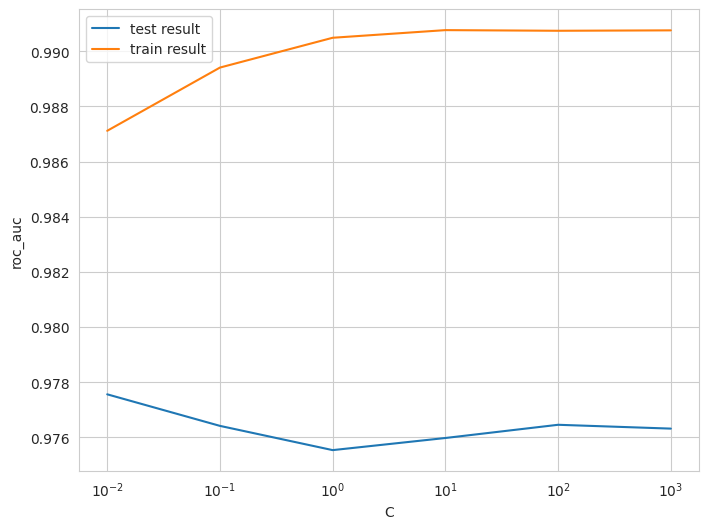

In [69]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [70]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9775602291125374 at C = 0.01


Logistic regression with optimal C

In [71]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.01)

In [72]:

# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(x_train_rus, y_train_rus)

Prediction on the train set

In [73]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(x_train_rus)


In [74]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[380   3]
 [ 46 337]]


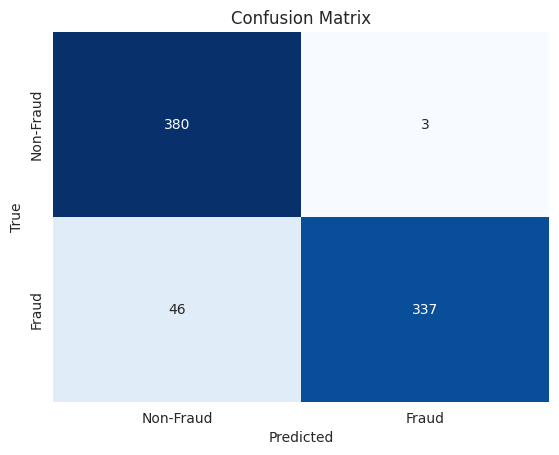

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_train_pred contains the predicted values
# and y_train_rus contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [76]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [77]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9360313315926893
Sensitivity:- 0.8798955613577023
Specificity:- 0.9921671018276762
F1-Score:- 0.9322268326417703


In [78]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       383
           1       0.99      0.88      0.93       383

    accuracy                           0.94       766
   macro avg       0.94      0.94      0.94       766
weighted avg       0.94      0.94      0.94       766



In [79]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(x_train_rus)[:,1]

In [80]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9863588953500262

In [81]:
from sklearn.metrics import roc_curve, auc

In [82]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

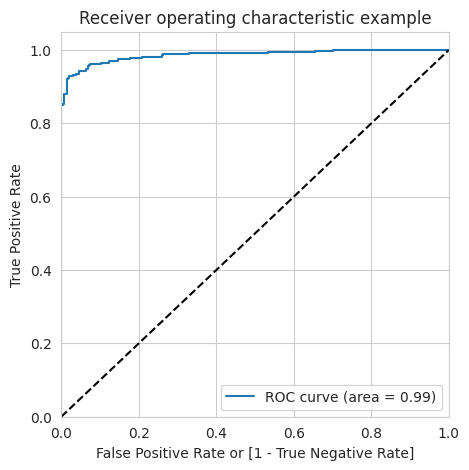

In [83]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

In [84]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(x_test)

In [85]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54320   634]
 [   13    77]]


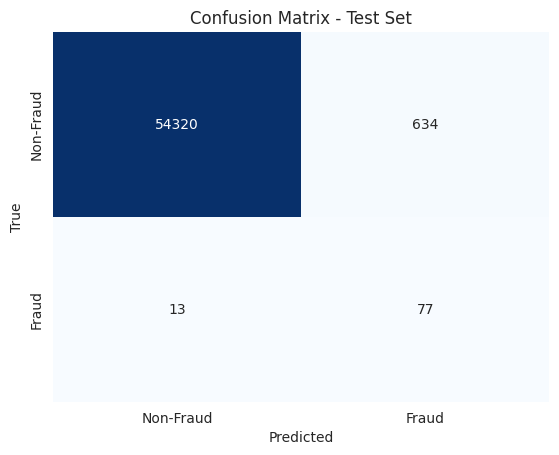

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test_pred contains the predicted values and y_test contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Display the plot
plt.show()


In [87]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9882457670227455
Sensitivity:- 0.8555555555555555
Specificity:- 0.9884630782108673
F1-Score:- 0.19225967540574282


High Accuracy but low F1 score could indicate underfitting on an unbalanced dataset.

In [89]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     54954
           1       0.11      0.86      0.19        90

    accuracy                           0.99     55044
   macro avg       0.55      0.92      0.59     55044
weighted avg       1.00      0.99      0.99     55044



In [90]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(x_test)[:,1]

In [91]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9769132163061631

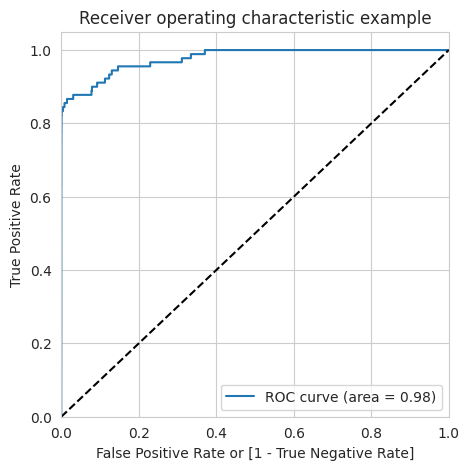

In [92]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

High Accuracy but low F1 score.

As we can see that there is a sudden drop in F1 score, it indicate underfitting on an unbalanced dataset.

**XGBOOST**

In [93]:
from xgboost import XGBClassifier


In [94]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [95]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.140219,0.020909,0.008715,0.000328,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.958252,0.987205,0.987143,0.977533,0.013634,4,1.0,1.0,0.999985,0.999995,0.000007
1,0.129792,0.006063,0.008230,0.000046,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.969177,0.987020,0.988250,0.981483,0.008716,1,1.0,1.0,1.000000,1.000000,0.000000
2,0.143435,0.007590,0.008213,0.000081,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.965393,0.984683,0.990527,0.980201,0.010739,3,1.0,1.0,1.000000,1.000000,0.000000
3,0.093552,0.007190,0.008924,0.000982,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.954102,0.971580,0.985482,0.970388,0.012839,6,1.0,1.0,1.000000,1.000000,0.000000
4,0.097296,0.002455,0.009003,0.000599,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.962891,0.982468,0.985113,0.976824,0.009911,5,1.0,1.0,1.000000,1.000000,0.000000
5,0.112787,0.006606,0.008915,0.001295,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.967407,0.987451,0.986651,0.980503,0.009266,2,1.0,1.0,1.000000,1.000000,0.000000


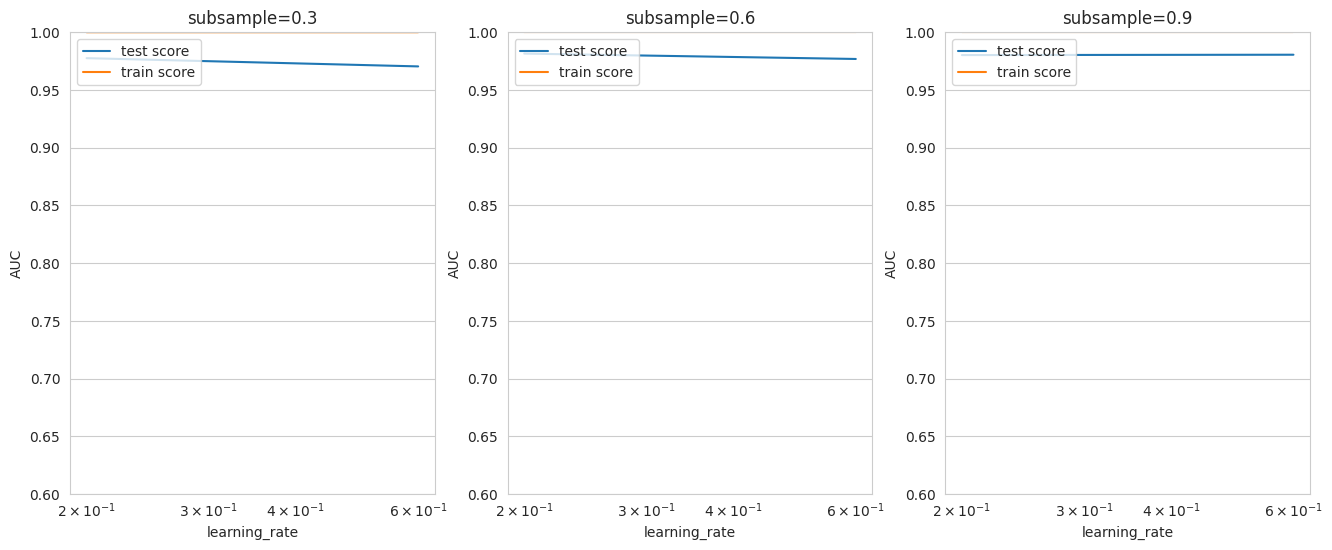

In [96]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [97]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

Model with optimal hyperparameters

We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.

In [98]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(x_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [99]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(x_train_rus)

In [100]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[383   0]
 [  0 383]]


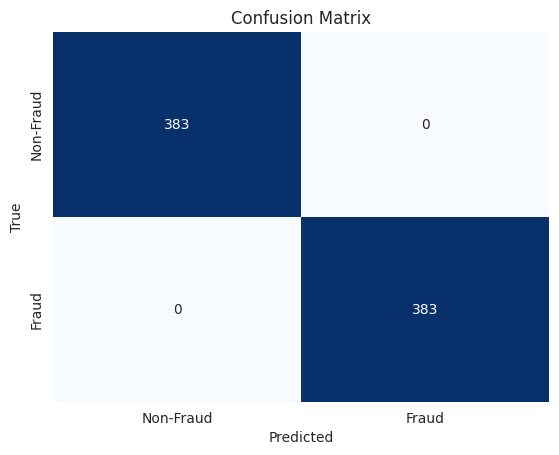

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_train_pred contains the predicted values
# and y_train_rus contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [102]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [104]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       383
           1       1.00      1.00      1.00       383

    accuracy                           1.00       766
   macro avg       1.00      1.00      1.00       766
weighted avg       1.00      1.00      1.00       766



In [105]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(x_train_rus)[:,1]

In [106]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

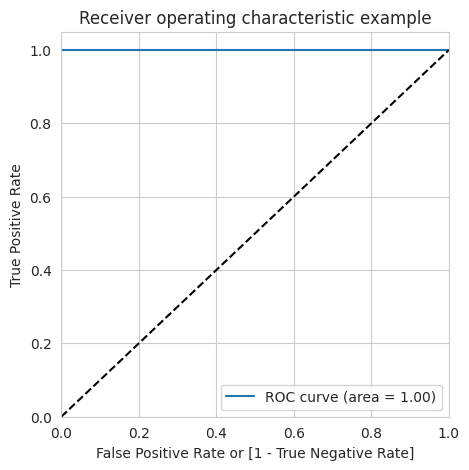

In [107]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set

In [108]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(x_test)

In [109]:
#Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[52521  2433]
 [    9    81]]


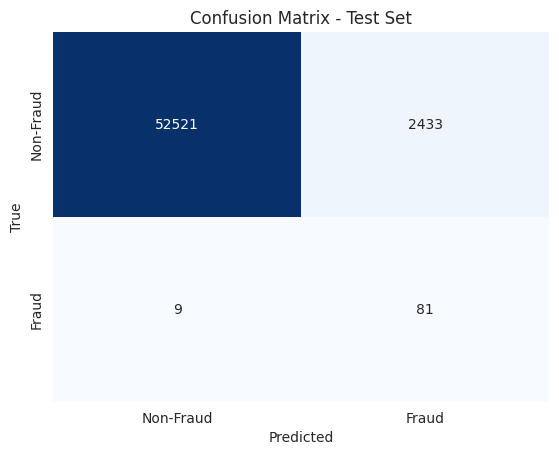

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test_pred contains the predicted values and y_test contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Display the plot
plt.show()

In [111]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9556354916067147
Sensitivity:- 0.9
Specificity:- 0.9557266077082651
F1-Score:- 0.062211981566820285


In [113]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     54954
           1       0.03      0.90      0.06        90

    accuracy                           0.96     55044
   macro avg       0.52      0.93      0.52     55044
weighted avg       1.00      0.96      0.98     55044



In [114]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(x_test)[:,1]

In [115]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9621940370329932

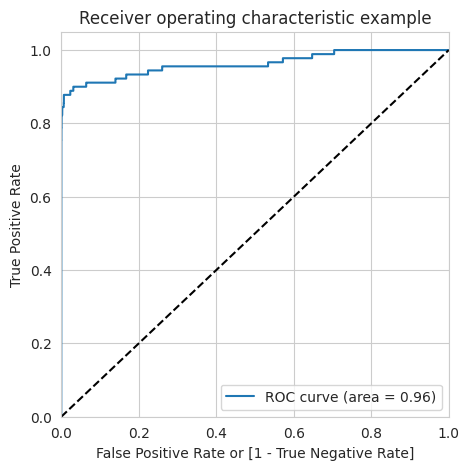

In [116]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

F1 is low, underfitting

**Decision Tree**

In [117]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()


In [118]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [119]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007417,0.001468,0.002992,0.000196,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.944641,0.979515,0.966720,0.963625,0.014404,2
1,0.007413,0.001446,0.003141,0.000466,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.945557,0.979085,0.970442,0.965028,0.014213,1
2,0.004832,0.000037,0.003013,0.000220,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.935669,0.971457,0.964167,0.957098,0.015442,8
3,0.006892,0.000749,0.004307,0.000767,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.935303,0.971088,0.967581,0.957991,0.016106,7
4,0.006702,0.000310,0.003623,0.000933,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.940948,0.972841,0.970380,0.961390,0.014489,4
5,0.006750,0.000482,0.002953,0.000067,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.943481,0.972933,0.970257,0.962224,0.013298,3
6,0.005444,0.000723,0.003159,0.000271,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.936646,0.971211,0.967212,0.958356,0.015438,6
7,0.005734,0.001060,0.003095,0.000206,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.936646,0.972072,0.967212,0.958643,0.015681,5


In [120]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9650276564550525
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [121]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(x_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

Prediction on the train set

In [122]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(x_train_rus)

In [123]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[372  11]
 [ 45 338]]


In [124]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

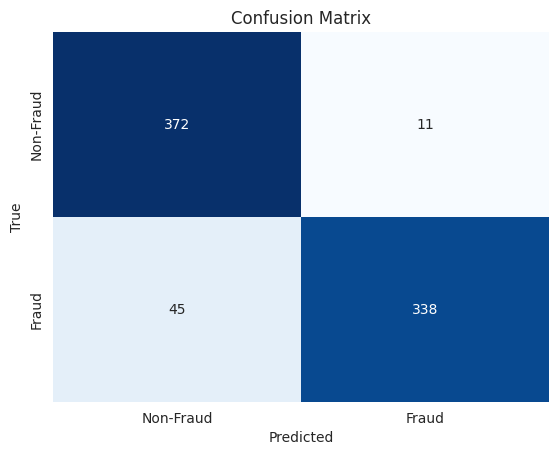

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_train_pred contains the predicted values
# and y_train_rus contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [126]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9268929503916449
Sensitivity:- 0.8825065274151436
Specificity:- 0.9712793733681462
F1-Score:- 0.9234972677595628


In [127]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       383
           1       0.97      0.88      0.92       383

    accuracy                           0.93       766
   macro avg       0.93      0.93      0.93       766
weighted avg       0.93      0.93      0.93       766



In [128]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(x_train_rus)[:,1]

In [129]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9793985915781006

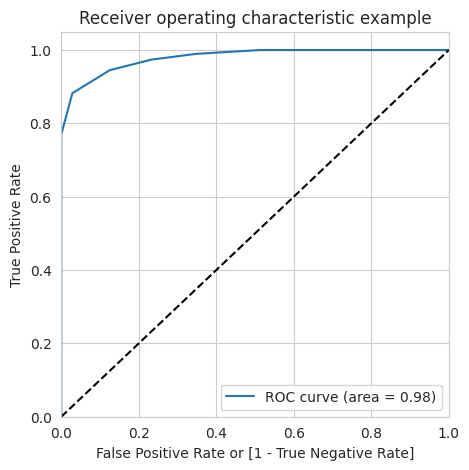

In [130]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

Prediction on the test set

In [131]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(x_test)

In [132]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[52579  2375]
 [   13    77]]


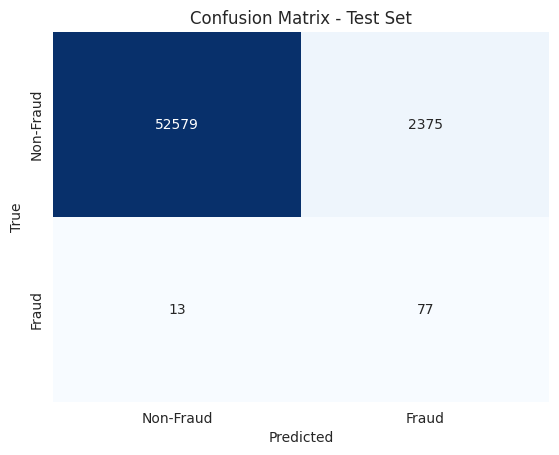

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test_pred contains the predicted values and y_test contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Display the plot
plt.show()


In [134]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9566165249618487
Sensitivity:- 0.8555555555555555
Specificity:- 0.956782035884558
F1-Score:- 0.060582218725413056


In [136]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     54954
           1       0.03      0.86      0.06        90

    accuracy                           0.96     55044
   macro avg       0.52      0.91      0.52     55044
weighted avg       1.00      0.96      0.98     55044



In [137]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(x_test)[:,1]

In [138]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9515148022790778

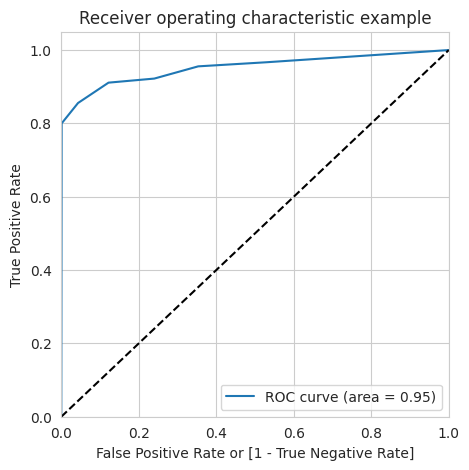

In [139]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Oversampling**

In [140]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [141]:
# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [142]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 219790, 1: 383})
New class distribution:- Counter({0: 219790, 1: 219790})


In [143]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(x_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [144]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.999329,0.266364,0.054995,0.011136,0.01,{'C': 0.01},0.986836,0.986830,0.987483,0.987592,...,0.987181,0.000317,6,0.987277,0.987228,0.987180,0.987091,0.987207,0.987197,0.000062
1,2.598864,0.540985,0.063971,0.027264,0.1,{'C': 0.1},0.986859,0.986853,0.987513,0.987605,...,0.987203,0.000316,5,0.987299,0.987253,0.987203,0.987119,0.987233,0.987221,0.000060
2,2.624300,1.401187,0.046634,0.004257,1,{'C': 1},0.986861,0.986850,0.987515,0.987606,...,0.987203,0.000317,2,0.987301,0.987255,0.987205,0.987120,0.987234,0.987223,0.000060
3,2.208611,0.547965,0.055756,0.021208,10,{'C': 10},0.986861,0.986850,0.987516,0.987606,...,0.987203,0.000317,1,0.987301,0.987255,0.987205,0.987120,0.987234,0.987223,0.000060
4,2.169436,0.375653,0.058453,0.018137,100,{'C': 100},0.986861,0.986850,0.987515,0.987606,...,0.987203,0.000317,4,0.987301,0.987255,0.987205,0.987120,0.987234,0.987223,0.000060
5,2.295712,0.445046,0.052691,0.014675,1000,{'C': 1000},0.986861,0.986850,0.987515,0.987606,...,0.987203,0.000317,3,0.987301,0.987255,0.987205,0.987120,0.987234,0.987223,0.000060


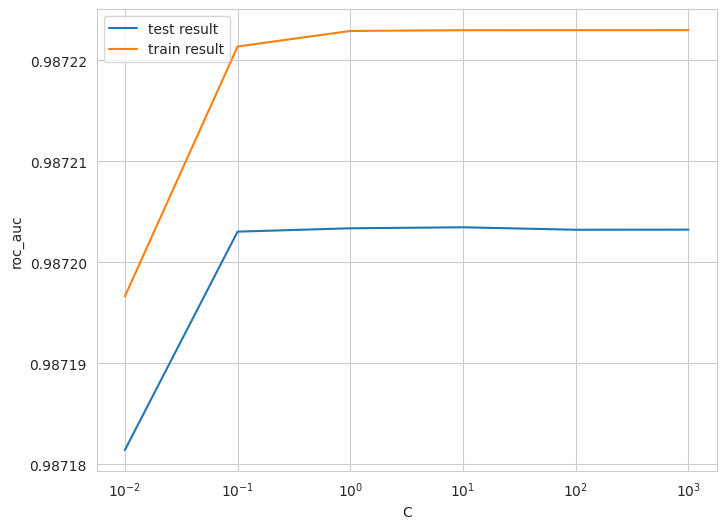

In [145]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [146]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9872034610758729 at C = 10


In [147]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=1000)

In [148]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(x_train_ros, y_train_ros)

Prediction on the train set

In [149]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(x_train_ros)

In [150]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[214270   5520]
 [ 15574 204216]]


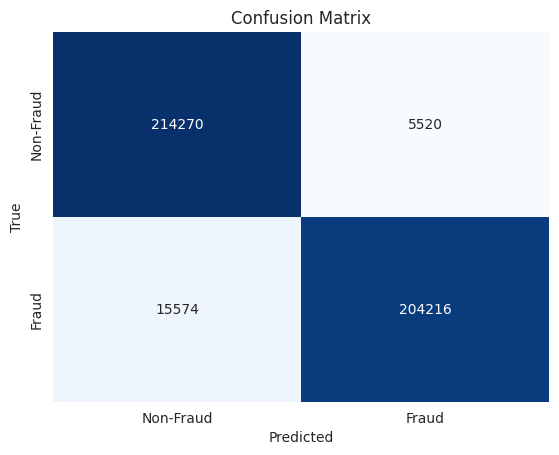

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_train_pred contains the predicted values
# and y_train_rus contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [152]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9520132854087993
Sensitivity:- 0.9291414532053324
Specificity:- 0.9748851176122663
F1-Score:- 0.9508900508933102


In [154]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    219790
           1       0.97      0.93      0.95    219790

    accuracy                           0.95    439580
   macro avg       0.95      0.95      0.95    439580
weighted avg       0.95      0.95      0.95    439580



In [155]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(x_train_ros)[:,1]

In [156]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9872204979873981

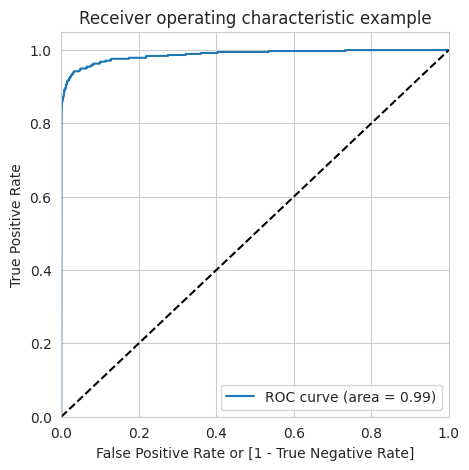

In [157]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [158]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(x_test)

In [159]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53525  1429]
 [   11    79]]


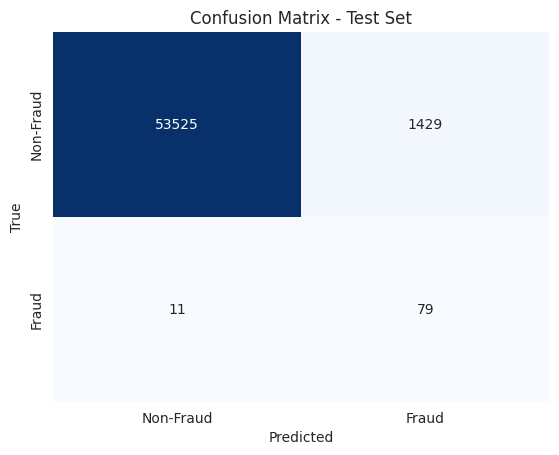

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test_pred contains the predicted values and y_test contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Display the plot
plt.show()



In [161]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [162]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.973839110529758
Sensitivity:- 0.8777777777777778
Specificity:- 0.9739964333806457
F1-Score:- 0.09887359198998748


In [163]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     54954
           1       0.05      0.88      0.10        90

    accuracy                           0.97     55044
   macro avg       0.53      0.93      0.54     55044
weighted avg       1.00      0.97      0.99     55044



In [164]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(x_test)[:,1]

In [165]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.978589365651272

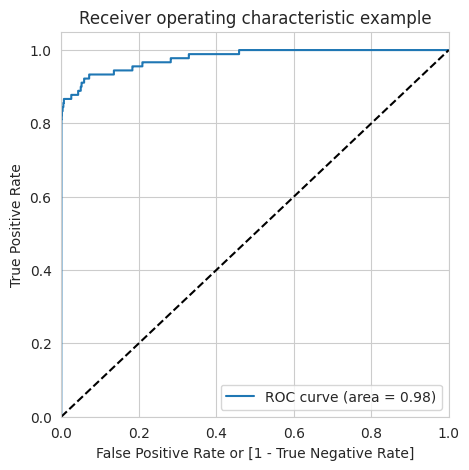

In [166]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)




High Accuracy and AUC but low F1 score on testset.

**XGBoost**

In [167]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [168]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.233479,0.942760,0.242972,0.008194,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999856,0.999868,0.999893,0.999872,0.000016,4,0.999878,0.999923,0.999871,0.999891,0.000023
1,7.270465,0.879085,0.305799,0.067962,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999848,0.999848,0.999884,0.999860,0.000017,6,0.999875,0.999904,0.999875,0.999884,0.000014
2,7.404346,1.041511,0.241299,0.003391,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999858,0.999851,0.999879,0.999863,0.000012,5,0.999873,0.999901,0.999864,0.999879,0.000016
3,7.692577,1.026924,0.246620,0.006145,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999980,0.999940,0.999986,0.999969,0.000020,3,0.999991,0.999993,0.999989,0.999991,0.000002
4,7.593178,0.916380,0.288053,0.074559,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999989,0.999964,0.999990,0.999981,0.000012,1,0.999998,0.999996,0.999991,0.999995,0.000003
5,6.736250,1.019808,0.240149,0.000631,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999979,0.999953,0.999991,0.999974,0.000016,2,0.999992,0.999995,0.999990,0.999992,0.000002


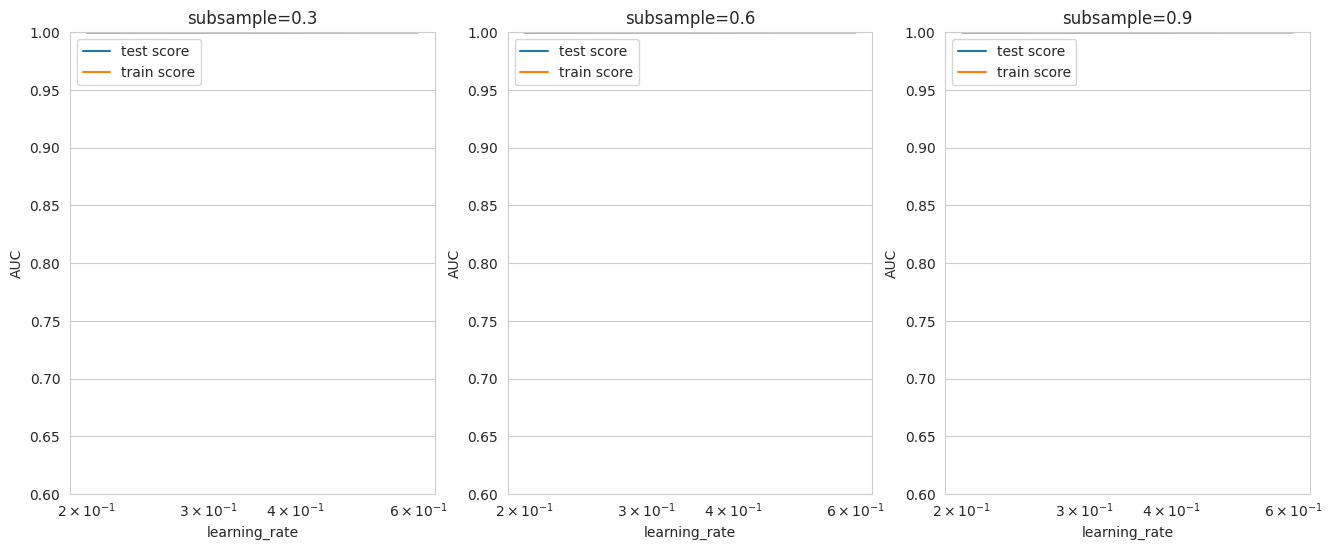

In [169]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    fraud_detection = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(fraud_detection["param_learning_rate"], fraud_detection["mean_test_score"])
    plt.plot(fraud_detection["param_learning_rate"], fraud_detection["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [170]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [171]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(x_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

Prediction on the train set

In [172]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(x_train_ros)

In [173]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[219790      0]
 [     0 219790]]


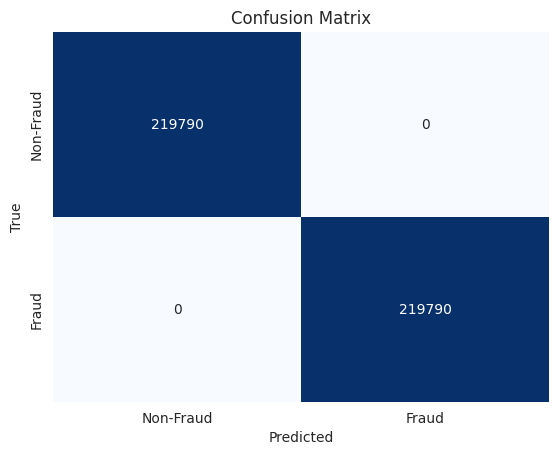

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_train_pred contains the predicted values
# and y_train_rus contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [175]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [176]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [177]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219790
           1       1.00      1.00      1.00    219790

    accuracy                           1.00    439580
   macro avg       1.00      1.00      1.00    439580
weighted avg       1.00      1.00      1.00    439580



In [178]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(x_train_ros)[:,1]

In [179]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

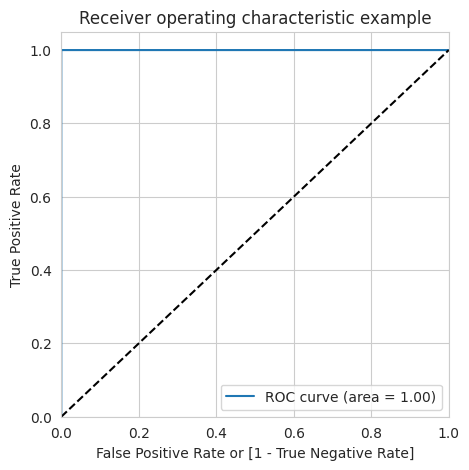

In [180]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

In [181]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(x_test)

In [182]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54947     7]
 [   15    75]]


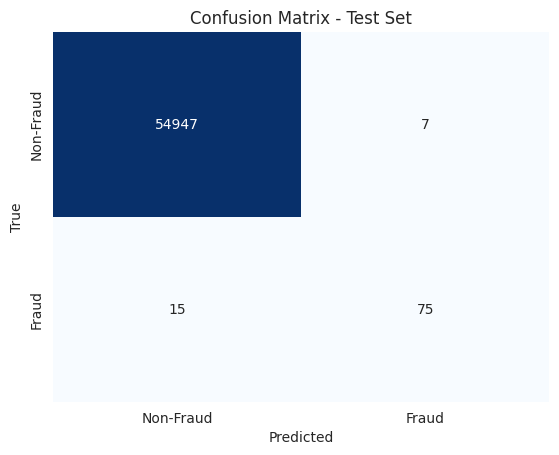

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test_pred contains the predicted values and y_test contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Display the plot
plt.show()


In [184]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [185]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9996003197442046
Sensitivity:- 0.8333333333333334
Specificity:- 0.999872620737344
F1-Score:- 0.872093023255814


In [186]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54954
           1       0.91      0.83      0.87        90

    accuracy                           1.00     55044
   macro avg       0.96      0.92      0.94     55044
weighted avg       1.00      1.00      1.00     55044



In [187]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(x_test)[:,1]

In [188]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9749659311019722

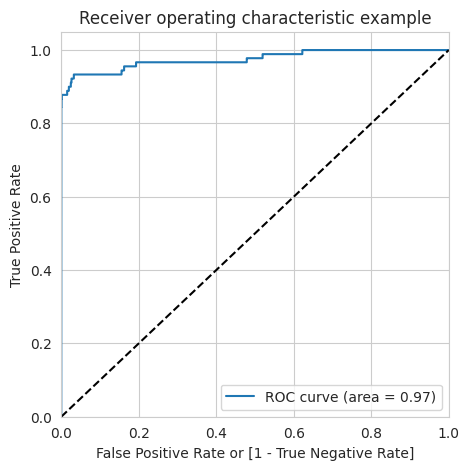

In [189]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

*Model summary for Over_Sampling- XG Boost*


Decision tree

In [190]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [191]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.456540,0.420924,0.048529,0.000745,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.988483,0.987261,0.988805,0.988183,0.000665,5
1,5.469096,0.109889,0.057498,0.014079,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.988483,0.987261,0.988805,0.988183,0.000665,5
2,5.098590,0.418187,0.046587,0.000503,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.988483,0.987261,0.988805,0.988183,0.000665,5
3,5.182295,0.398958,0.057879,0.009272,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.988483,0.987261,0.988805,0.988183,0.000665,5
4,8.095743,0.349129,0.063213,0.020906,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999514,0.999549,0.999576,0.999546,0.000025,1
5,8.007365,0.397130,0.049308,0.001320,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999529,0.999514,0.999535,0.999526,0.000009,2
6,8.115489,0.374068,0.057885,0.010924,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999438,0.999549,0.999578,0.999522,0.000060,3
7,7.925815,0.456664,0.059717,0.015278,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999391,0.999511,0.999564,0.999489,0.000073,4


In [192]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9995463295114139
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [193]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_ros_model.fit(x_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

Prediction on the train set

In [194]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(x_train_ros)

In [195]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(x_train_ros)

In [196]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[218262   1528]
 [     0 219790]]


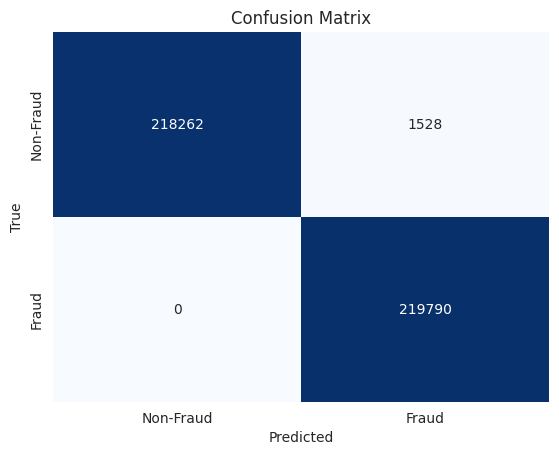

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_train_pred contains the predicted values
# and y_train_rus contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [198]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [199]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9965239546840166
Sensitivity:- 1.0
Specificity:- 0.9930479093680331
F1-Score:- 0.9965359957198691


In [200]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    219790
           1       0.99      1.00      1.00    219790

    accuracy                           1.00    439580
   macro avg       1.00      1.00      1.00    439580
weighted avg       1.00      1.00      1.00    439580



In [201]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(x_train_ros)[:,1]

In [202]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9996629028944924

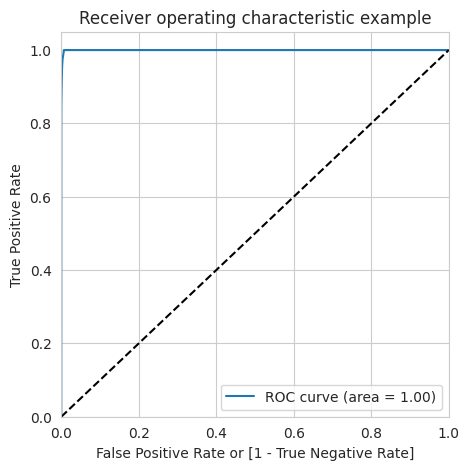

In [203]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

Prediction on the test set

In [204]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(x_test)

In [205]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54543   411]
 [   15    75]]


In [206]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [207]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9922607368650534
Sensitivity:- 0.8333333333333334
Specificity:- 0.9925210175783382
F1-Score:- 0.26041666666666663


In [208]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     54954
           1       0.15      0.83      0.26        90

    accuracy                           0.99     55044
   macro avg       0.58      0.91      0.63     55044
weighted avg       1.00      0.99      0.99     55044



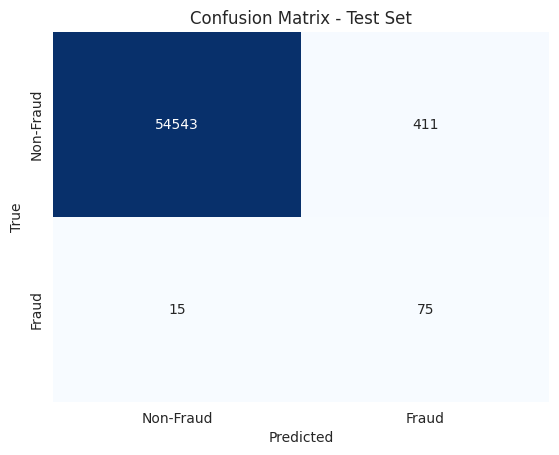

In [209]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test_pred contains the predicted values and y_test contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Display the plot
plt.show()

In [210]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(x_test)[:,1]

In [211]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9158610433776937

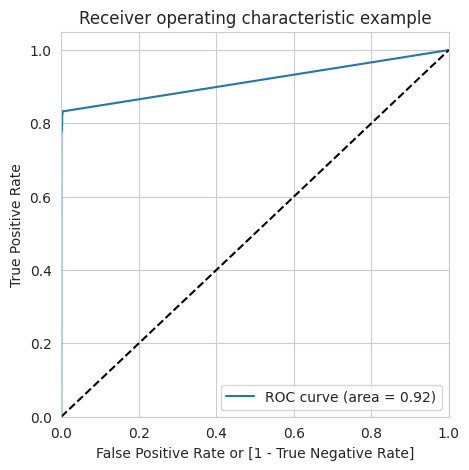

In [212]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

SMOTE (Synthetic Minority Oversampling Technique)

In [213]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [214]:
from imblearn.over_sampling import SMOTE


In [215]:

pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [216]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [217]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [218]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fit and apply SMOTE to the training data
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [219]:
print('Before SMOTE oversampling X_train shape=',x_train.shape)
print('After SMOTE oversampling X_train shape=',x_train_smote.shape)

Before SMOTE oversampling X_train shape= (220173, 29)
After SMOTE oversampling X_train shape= (439580, 29)


Logistic Regression

In [220]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(x_train_smote, y_train_smote)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [221]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.688808,0.659571,0.153728,0.056694,0.01,{'C': 0.01},0.991057,0.990882,0.990818,0.990902,...,0.990856,0.000142,6,0.990818,0.990822,0.990876,0.990880,0.990939,0.990867,0.000045
1,3.984770,0.916918,0.124811,0.051543,0.1,{'C': 0.1},0.991049,0.990902,0.990844,0.990912,...,0.990867,0.000137,1,0.990826,0.990837,0.990884,0.990896,0.990950,0.990879,0.000045
2,3.297239,0.992857,0.067969,0.019239,1,{'C': 1},0.991045,0.990902,0.990846,0.990911,...,0.990866,0.000136,2,0.990824,0.990837,0.990883,0.990896,0.990949,0.990878,0.000045
3,1.914158,0.115761,0.048141,0.001989,10,{'C': 10},0.991044,0.990902,0.990846,0.990910,...,0.990866,0.000136,3,0.990824,0.990837,0.990883,0.990896,0.990949,0.990878,0.000045
4,2.154827,0.526020,0.059101,0.024099,100,{'C': 100},0.991044,0.990902,0.990846,0.990910,...,0.990866,0.000136,4,0.990824,0.990837,0.990883,0.990896,0.990949,0.990878,0.000045
5,2.134425,0.602532,0.062504,0.027675,1000,{'C': 1000},0.991044,0.990902,0.990846,0.990910,...,0.990866,0.000136,5,0.990824,0.990837,0.990883,0.990896,0.990949,0.990878,0.000045


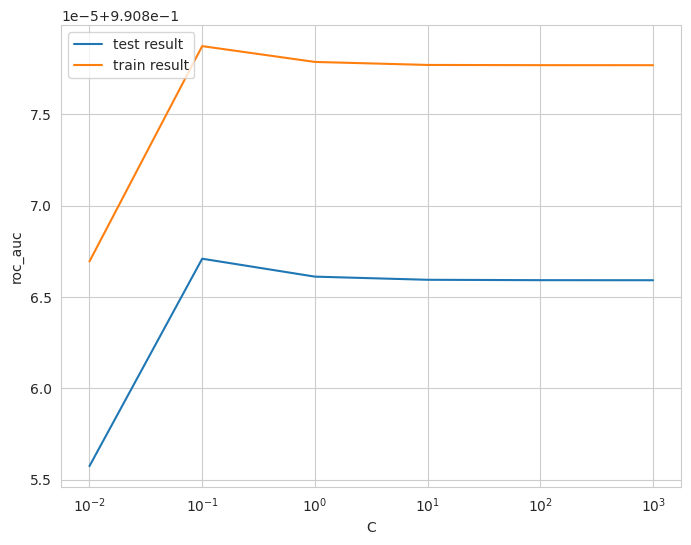

In [222]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [223]:
best_score = model_cv.best_score_

In [224]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9908670917113158 at C = 0.1


Logistic regression with optimal C

In [225]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=1000)

In [226]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(x_train_smote, y_train_smote)

Prediction on the train set

In [227]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(x_train_smote)

In [228]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[213944   5846]
 [ 14914 204876]]


In [229]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [230]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_smote, y_train_pred))

Accuracy:- 0.9527731015969789
Sensitivity:- 0.9321443195777788
Specificity:- 0.9734018836161791
F1-Score:- 0.9517783476418775


In [231]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    219790
           1       0.97      0.93      0.95    219790

    accuracy                           0.95    439580
   macro avg       0.95      0.95      0.95    439580
weighted avg       0.95      0.95      0.95    439580



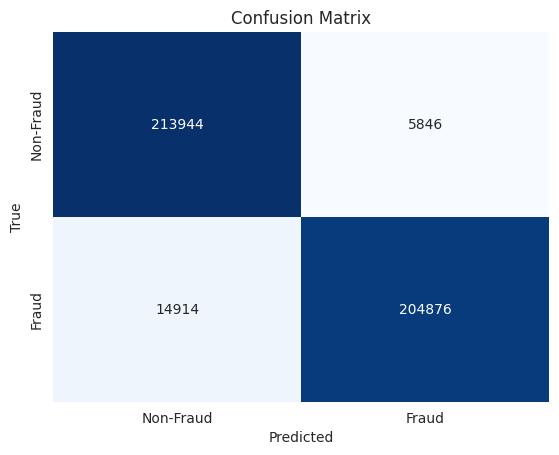

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_train_pred contains the predicted values
# and y_train_rus contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [233]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(x_train_smote)[:,1]

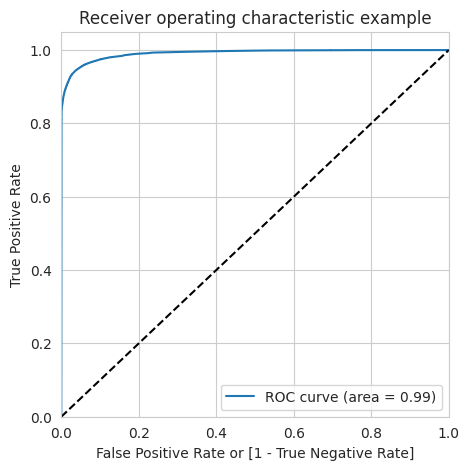

In [234]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

Prediction on the test set

In [235]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(x_test)

In [236]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53443  1511]
 [   10    80]]


In [237]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [238]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9723675604970569
Sensitivity:- 0.8888888888888888
Specificity:- 0.9725042763038177
F1-Score:- 0.09518143961927424


In [239]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     54954
           1       0.05      0.89      0.10        90

    accuracy                           0.97     55044
   macro avg       0.53      0.93      0.54     55044
weighted avg       1.00      0.97      0.98     55044



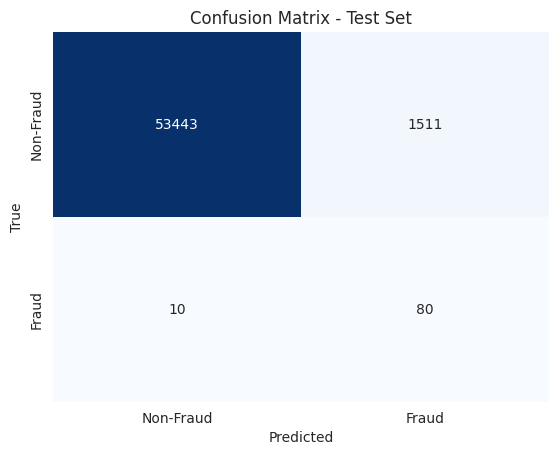

In [240]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test_pred contains the predicted values and y_test contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Display the plot
plt.show()

ROC on the test set

In [241]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(x_test)[:,1]

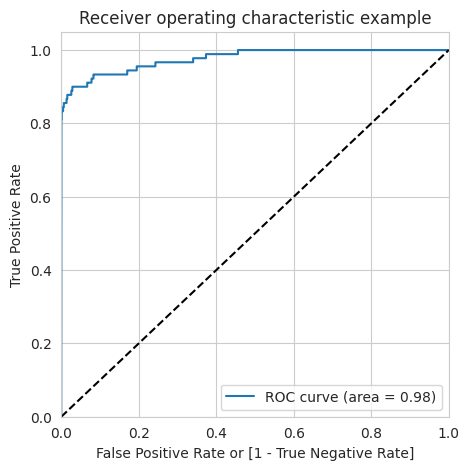

In [242]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

XGBoost

In [243]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [244]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,15.541757,8.407350,0.375132,0.177494,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999640,0.999649,0.999672,0.999654,0.000014,4,0.999687,0.999721,0.999656,0.999688,0.000026
1,9.517103,3.276601,0.306098,0.077073,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999608,0.999624,0.999668,0.999633,0.000025,5,0.999659,0.999696,0.999657,0.999671,0.000018
2,7.212238,0.800794,0.326565,0.095303,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999609,0.999616,0.999659,0.999628,0.000022,6,0.999645,0.999665,0.999636,0.999649,0.000012
3,8.069910,1.292168,0.245666,0.003829,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999940,0.999917,0.999954,0.999937,0.000015,3,0.999966,0.999972,0.999959,0.999966,0.000005
4,7.748343,0.983766,0.255858,0.014914,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999950,0.999930,0.999955,0.999945,0.000011,2,0.999967,0.999972,0.999970,0.999970,0.000002
5,6.875945,1.054343,0.251468,0.009210,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999944,0.999933,0.999961,0.999946,0.000011,1,0.999970,0.999974,0.999964,0.999969,0.000004


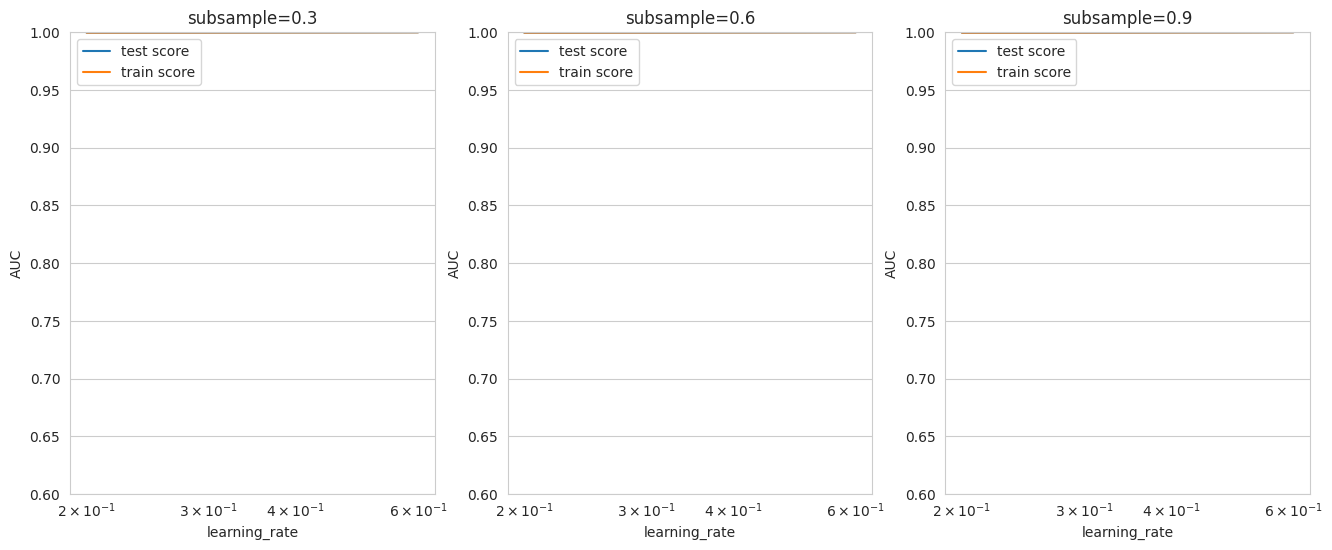

In [245]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [246]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [247]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

Prediction on the train set

In [248]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(x_train_smote)

In [249]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[219787      3]
 [     0 219790]]


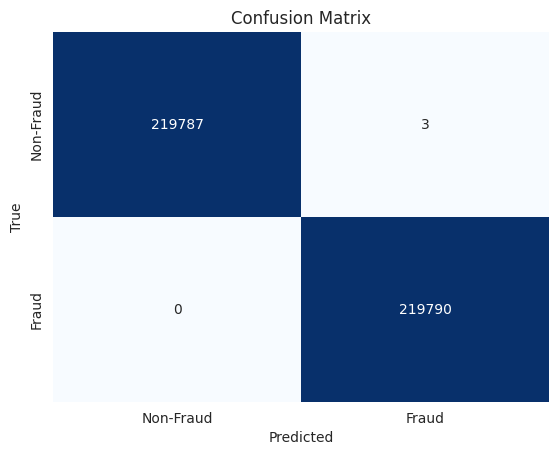

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_train_pred contains the predicted values
# and y_train_rus contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [251]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [252]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_smote, y_train_pred))

Accuracy:- 0.999993175303699
Sensitivity:- 1.0
Specificity:- 0.9999863506073979
F1-Score:- 0.9999931753502751


In [253]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    219790
           1       1.00      1.00      1.00    219790

    accuracy                           1.00    439580
   macro avg       1.00      1.00      1.00    439580
weighted avg       1.00      1.00      1.00    439580



In [254]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(x_train_smote)[:,1]

In [255]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

1.0

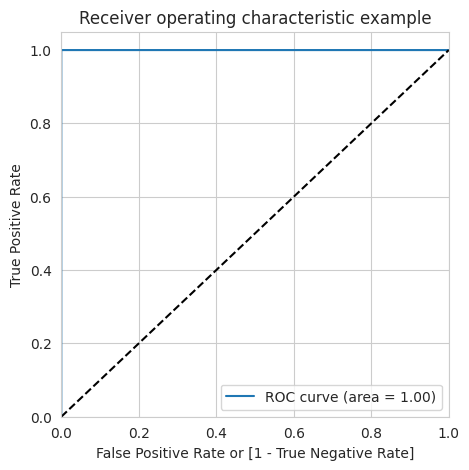

In [256]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

# Prediction on the test set

In [257]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(x_test)

In [258]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54922    32]
 [   15    75]]


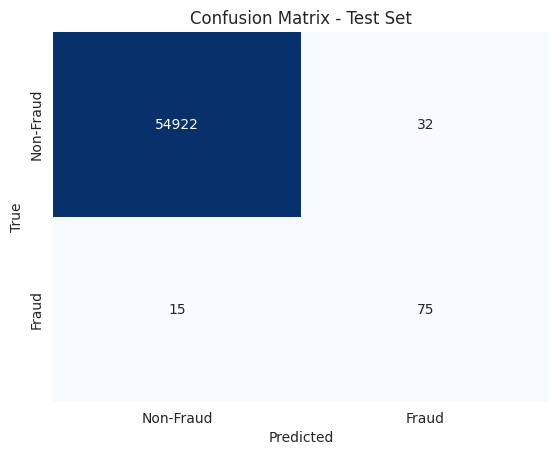

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test_pred contains the predicted values and y_test contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Display the plot
plt.show()



In [260]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [261]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9991461376353463
Sensitivity:- 0.8333333333333334
Specificity:- 0.9994176947992867
F1-Score:- 0.7614213197969543


In [262]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54954
           1       0.70      0.83      0.76        90

    accuracy                           1.00     55044
   macro avg       0.85      0.92      0.88     55044
weighted avg       1.00      1.00      1.00     55044



In [263]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(x_test)[:,1]

In [264]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9697589499096215

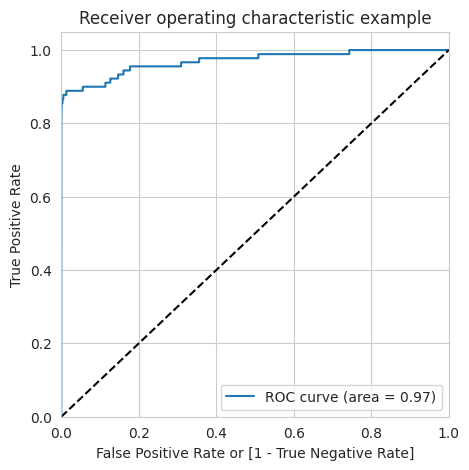

In [265]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Decision Tree

In [266]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [267]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,9.027481,0.576773,0.055276,0.011844,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.981961,0.981047,0.981596,0.981534,0.000376,5
1,8.754283,0.227418,0.057849,0.016302,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.981959,0.981047,0.981577,0.981528,0.000374,6
2,8.636186,0.373419,0.055009,0.012158,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.981908,0.980986,0.981509,0.981468,0.000378,7
3,8.699701,0.391224,0.047709,0.000735,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.981896,0.980986,0.981504,0.981462,0.000373,8
4,16.699534,0.379500,0.109266,0.079221,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.996860,0.997102,0.997428,0.997130,0.000233,1
5,16.503602,0.444491,0.052864,0.001214,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.996832,0.997062,0.997456,0.997117,0.000258,2
6,16.591683,0.319922,0.065398,0.017165,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.996590,0.996955,0.997361,0.996969,0.000315,3
7,16.279430,0.123753,0.052782,0.000580,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.996536,0.996920,0.997316,0.996924,0.000319,4


In [268]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9971299058958006
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [269]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

Prediction on the train set

In [270]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(x_train_smote)

In [271]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[216628   3162]
 [  2969 216821]]


In [272]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [273]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_smote, y_train_pred))

Accuracy:- 0.9860525956594931
Sensitivity:- 0.986491651121525
Specificity:- 0.9856135401974612
F1-Score:- 0.986058716656093


In [274]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    219790
           1       0.99      0.99      0.99    219790

    accuracy                           0.99    439580
   macro avg       0.99      0.99      0.99    439580
weighted avg       0.99      0.99      0.99    439580



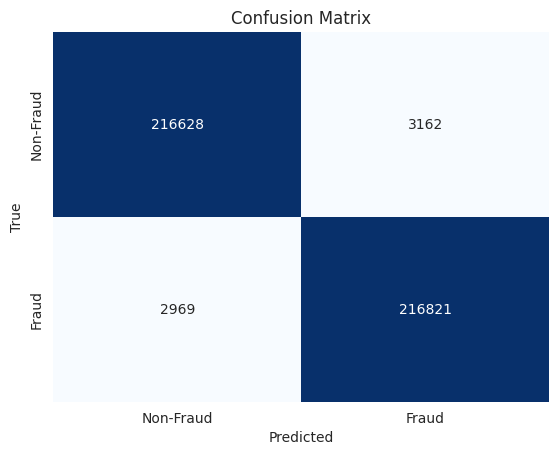

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_train_pred contains the predicted values
# and y_train_rus contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [276]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(x_train_smote)[:,1]

In [277]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9982197442847353

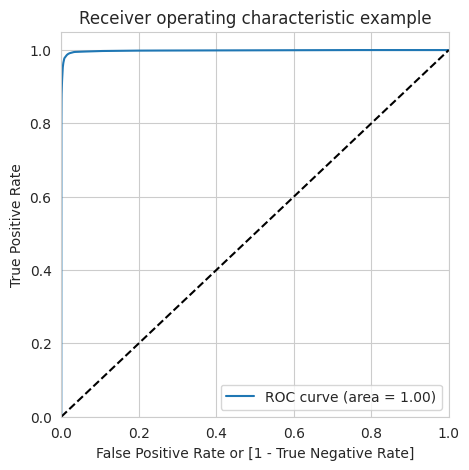

In [278]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

Prediction on the test set

In [279]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(x_test)

In [280]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54085   869]
 [   13    77]]


In [281]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

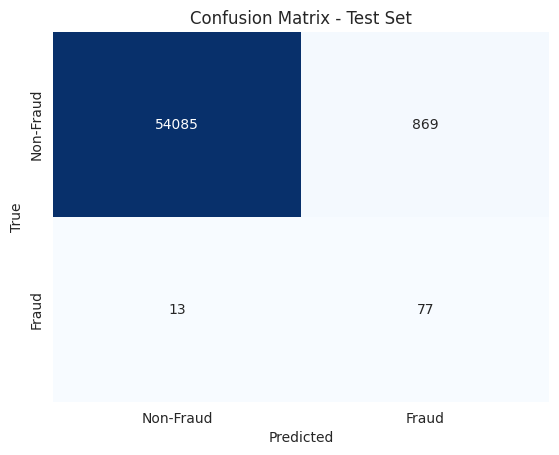

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming y_test_pred contains the predicted values and y_test contains the true labels

# Generate confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

# Create a heatmap using seaborn
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')

# Display the plot
plt.show()



In [283]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9839764551994767
Sensitivity:- 0.8555555555555555
Specificity:- 0.9841867743931288
F1-Score:- 0.14864864864864866


In [284]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     54954
           1       0.08      0.86      0.15        90

    accuracy                           0.98     55044
   macro avg       0.54      0.92      0.57     55044
weighted avg       1.00      0.98      0.99     55044



In [285]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(x_test)[:,1]

In [286]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9151569191202339

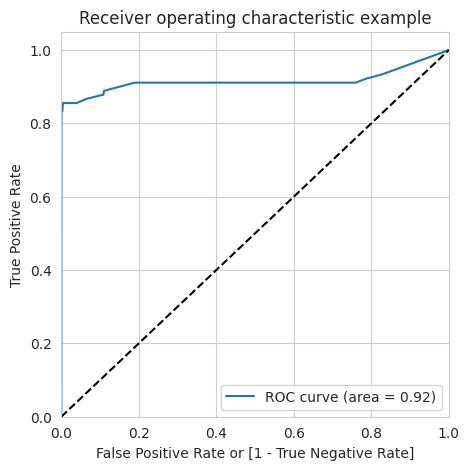

In [287]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Logistic regression model with SMOTE